In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

data = datasets.load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
df.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  Target  
0                          3.92   1065.0       0  
1                          3.40   1050.0       0  
2                          3.17   1185.0       0  
3                          3.45   1480.0       0  
4                          2.93    735.0       0

In [2]:
from scipy.spatial import ConvexHull

def print_scipy_convex_hull(a, b):
    plt.figure(figsize = (10, 6))
    colors = ['b','r','g']
    plt.title(f"{data.feature_names[a].capitalize()} vs {data.feature_names[b].capitalize()}")
    plt.xlabel(data.feature_names[a])
    plt.ylabel(data.feature_names[b])
    for i in range(len(data.target_names)):
        bucket = df[df['Target'] == i]
        bucket = bucket.iloc[:,[a, b]].values
        hull = ConvexHull(bucket) 
        plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
        for simplex in hull.simplices:
            plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
    plt.legend()
    plt.show()

In [3]:
from myConvexHull.quickhull import KonvexHull

def print_my_convex_hull(a, b):
    plt.figure(figsize = (10, 6))
    colors = ['b','r','g']
    plt.title(f"{data.feature_names[a].capitalize()} vs {data.feature_names[b].capitalize()}")
    plt.xlabel(data.feature_names[a])
    plt.ylabel(data.feature_names[b])
    for i in range(len(data.target_names)):
        bucket = df[df['Target'] == i]
        bucket = bucket.iloc[:,[a, b]].values
        hull = KonvexHull(bucket)
        hull.fit()
        plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
        for simplex in hull.simplices:
            plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
    plt.legend()
    plt.show()

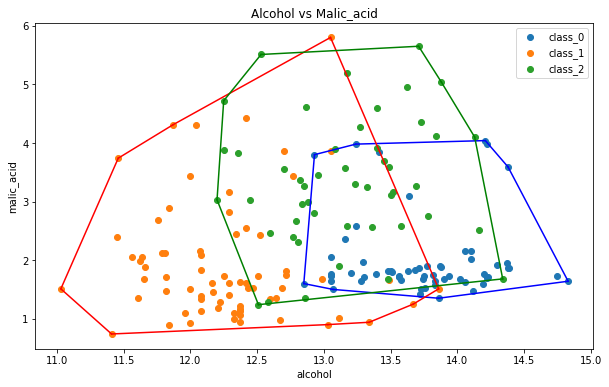

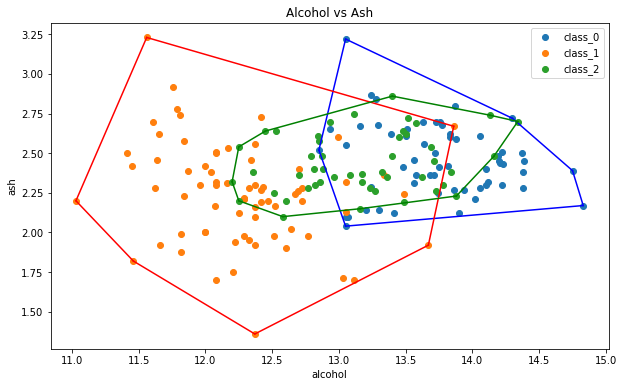

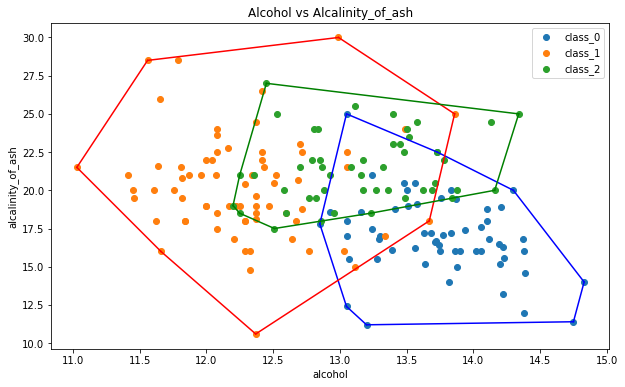

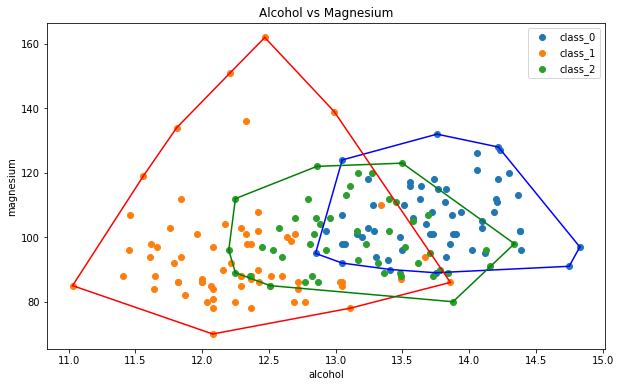

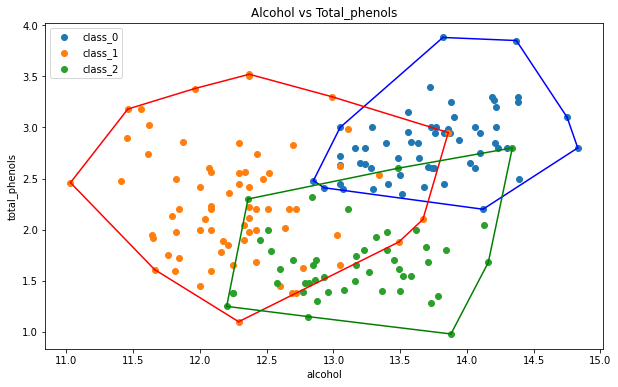

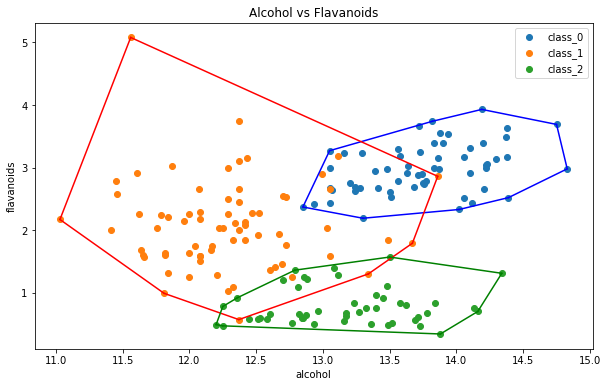

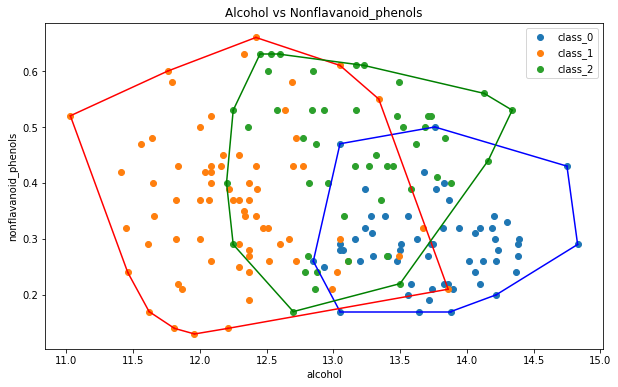

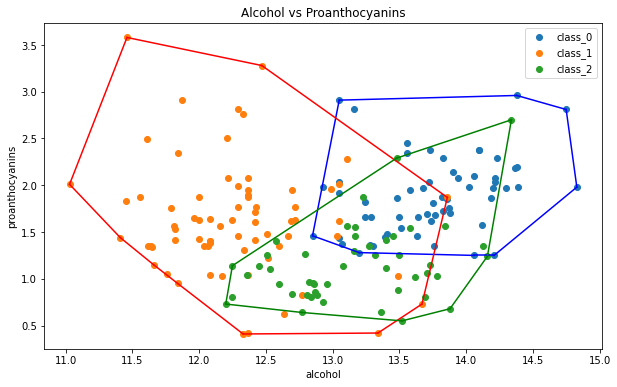

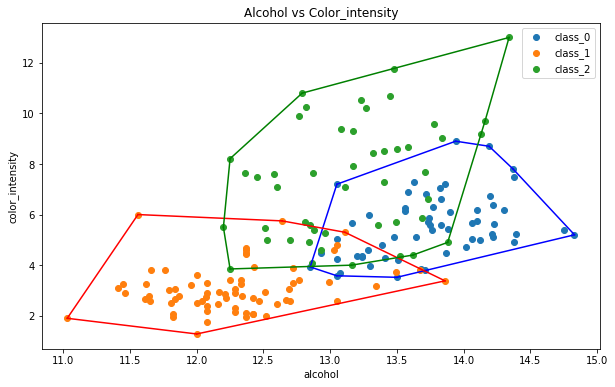

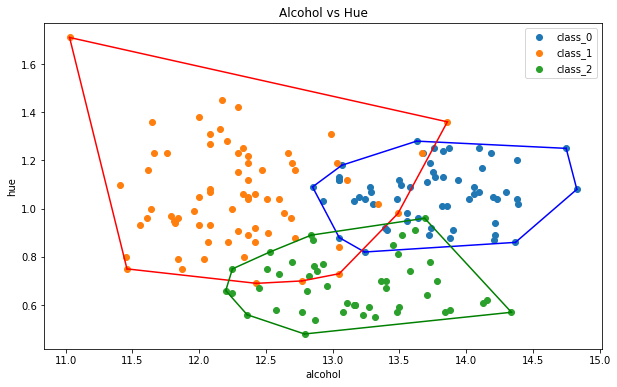

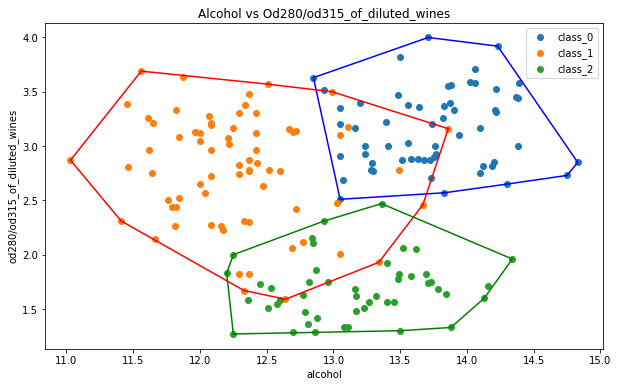

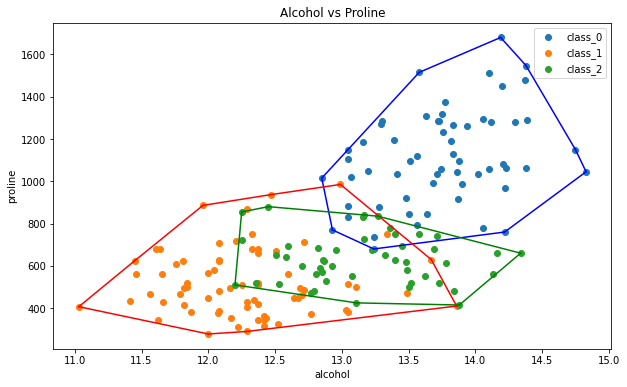

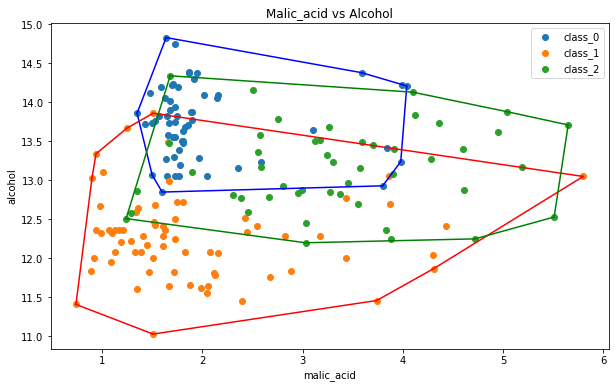

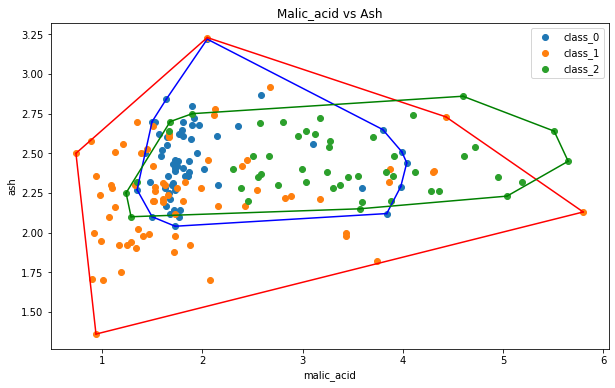

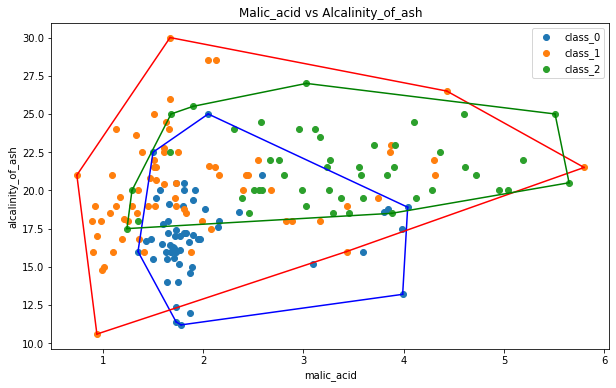

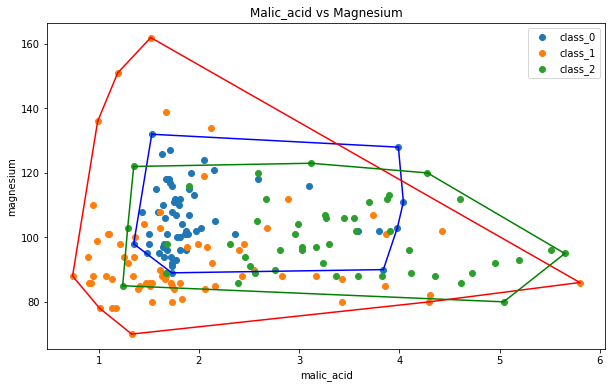

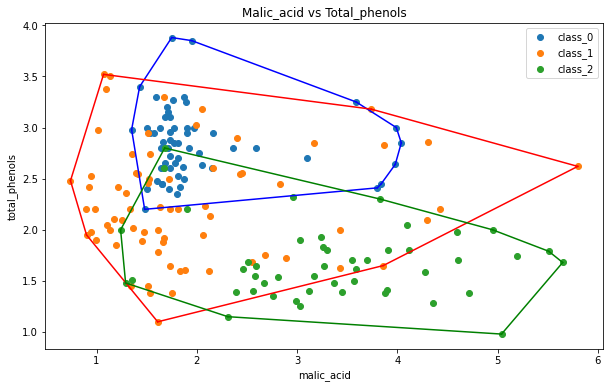

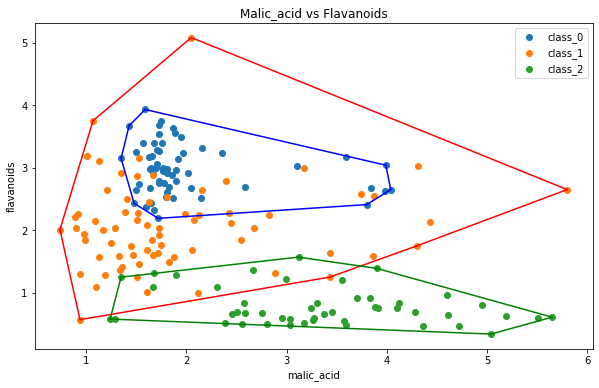

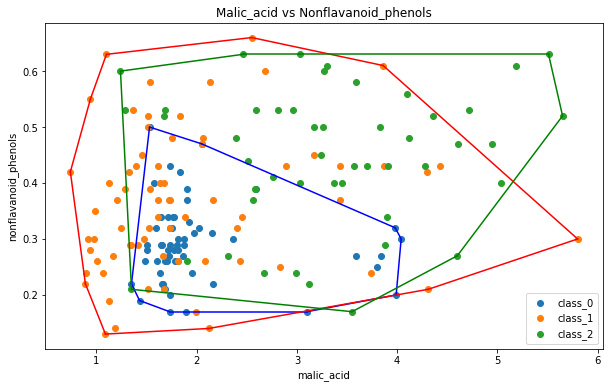

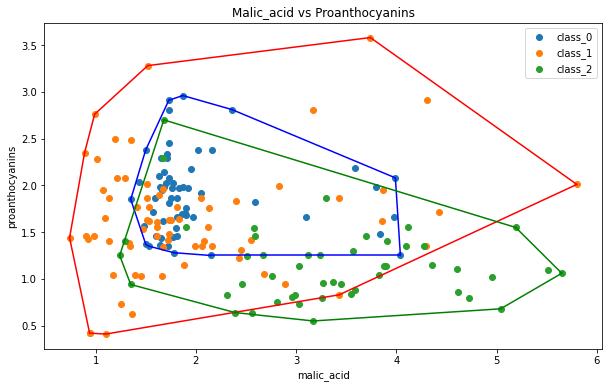

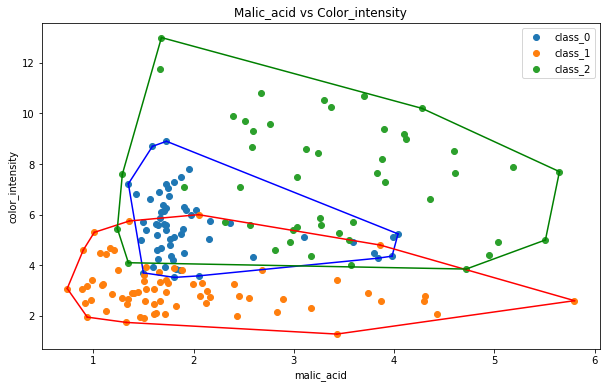

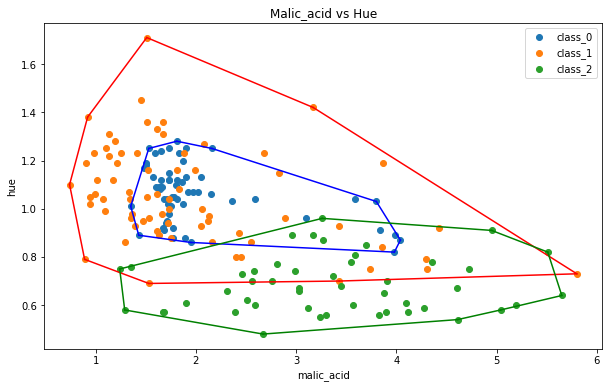

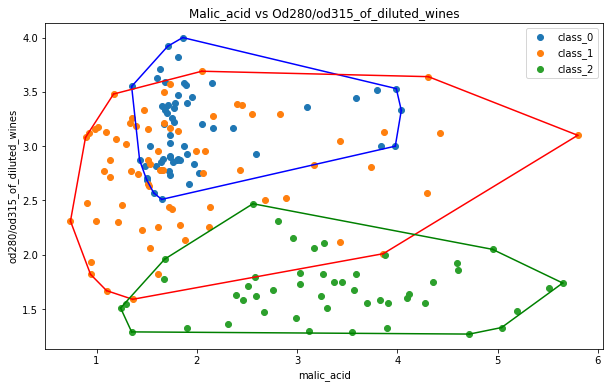

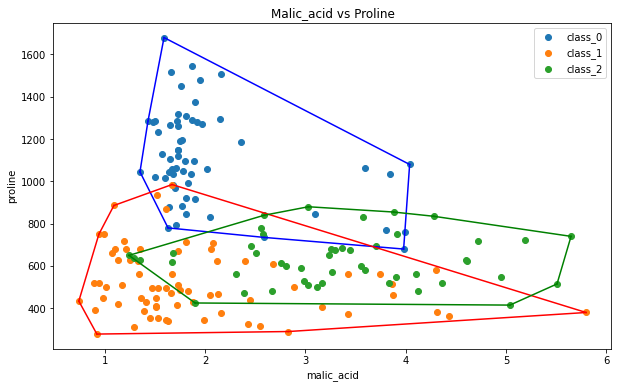

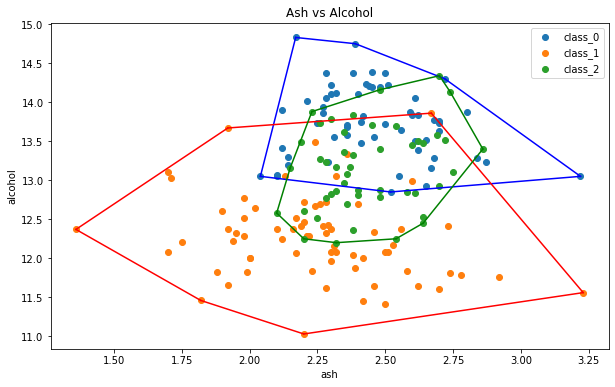

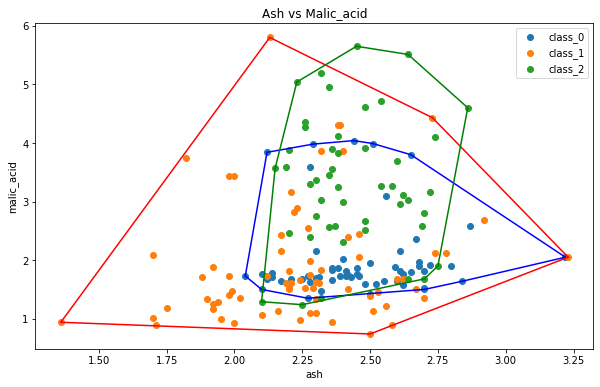

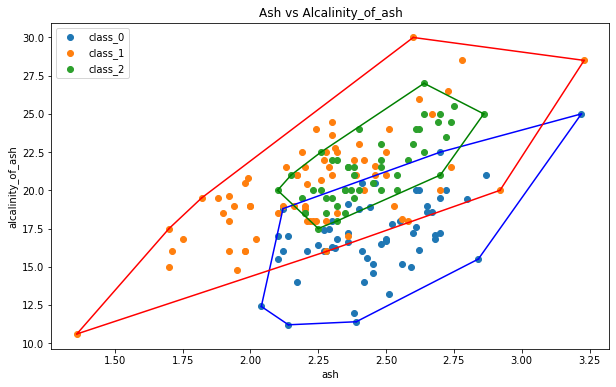

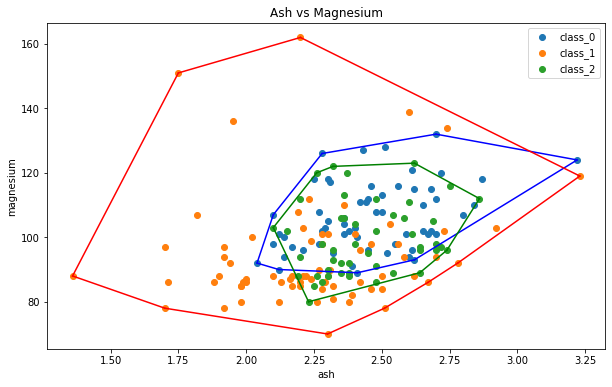

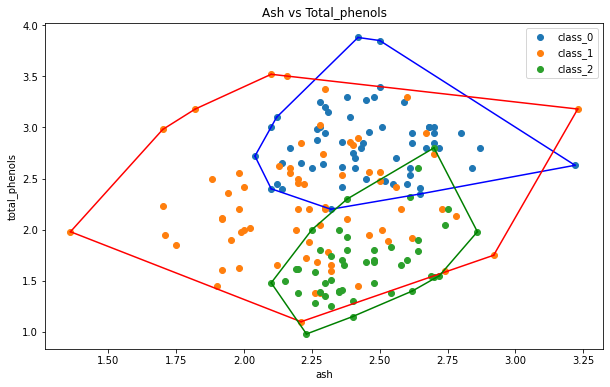

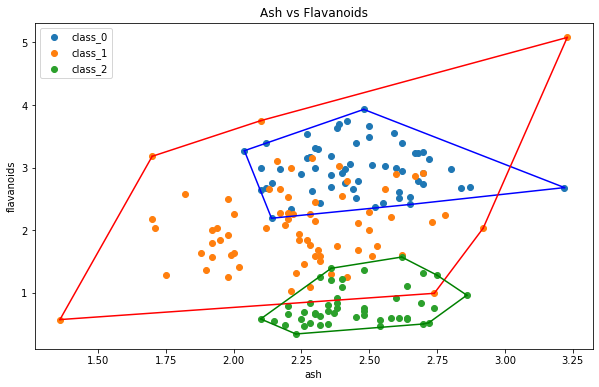

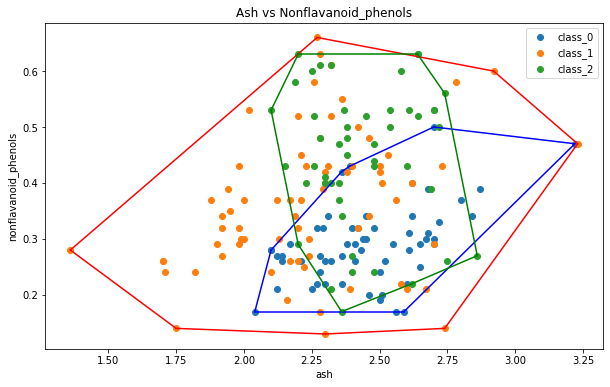

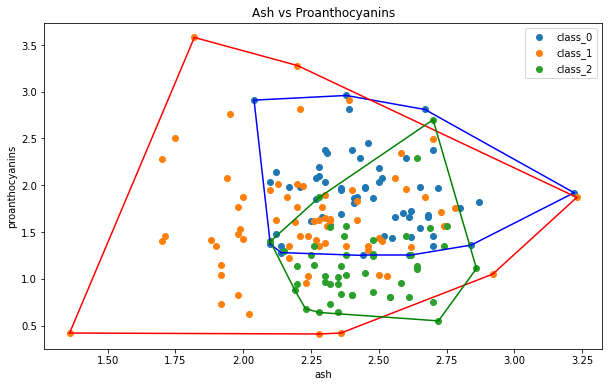

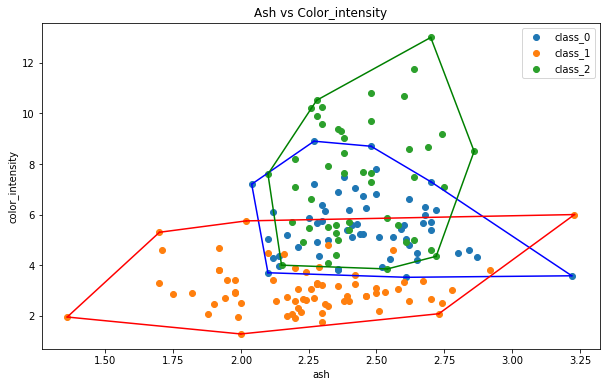

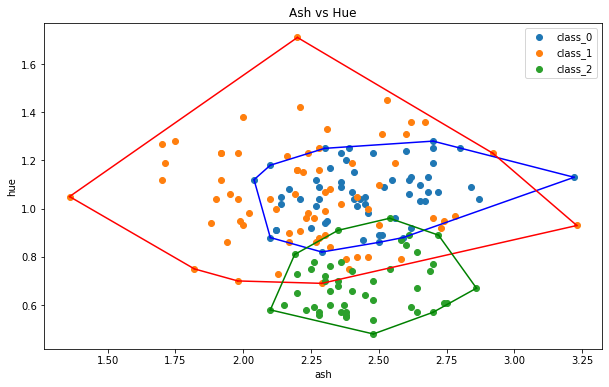

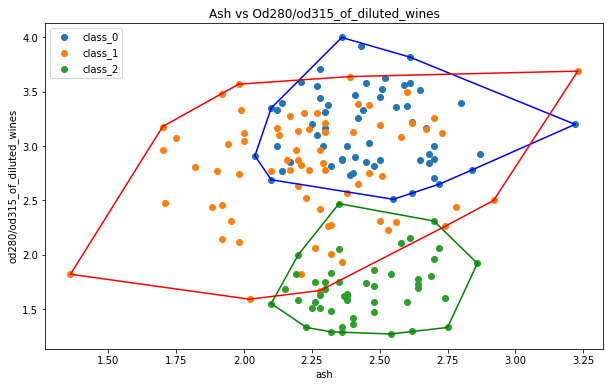

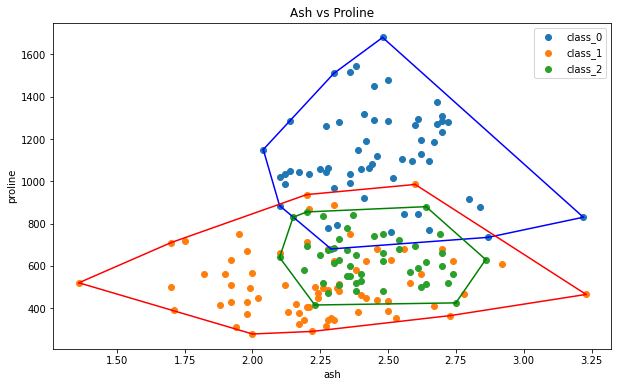

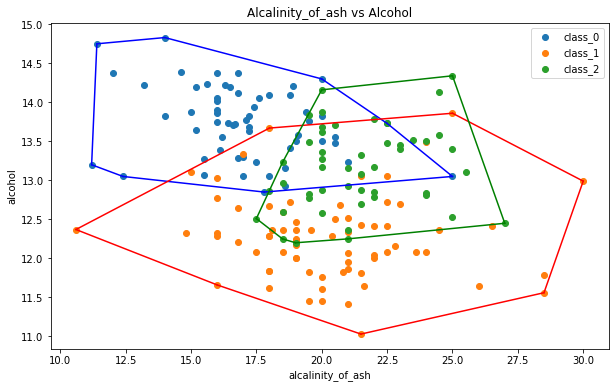

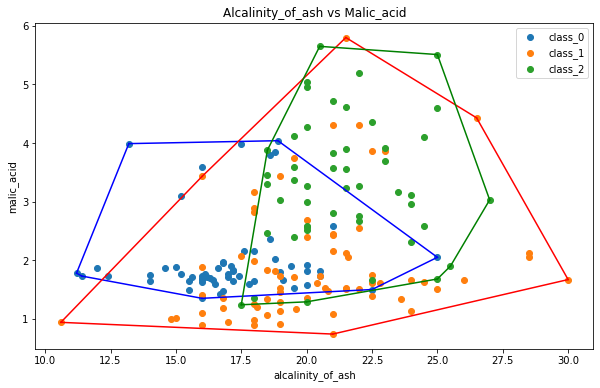

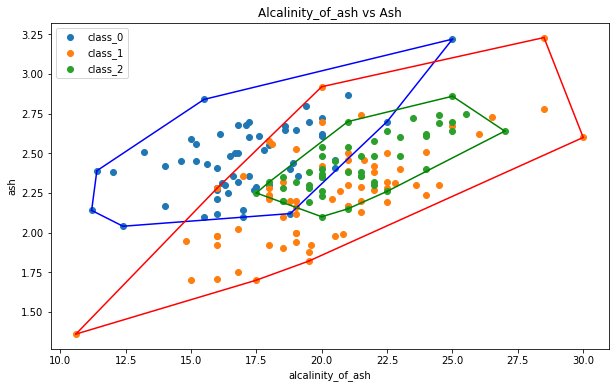

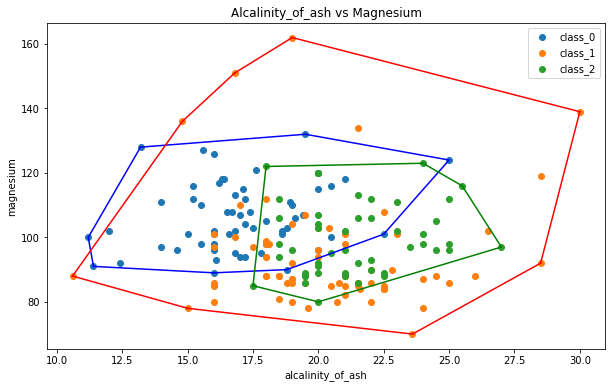

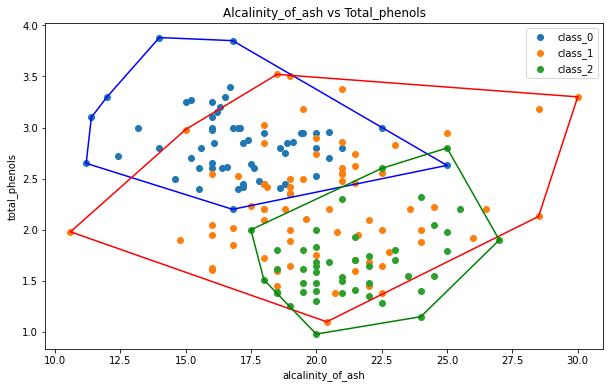

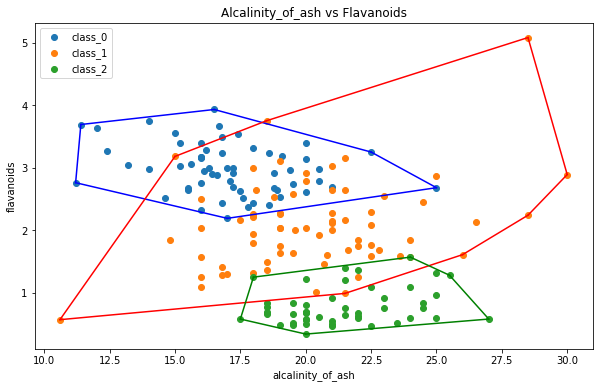

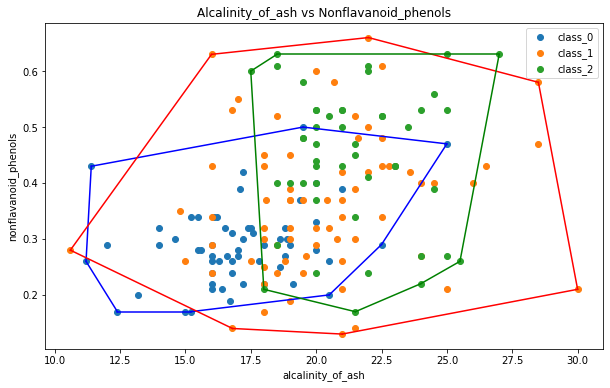

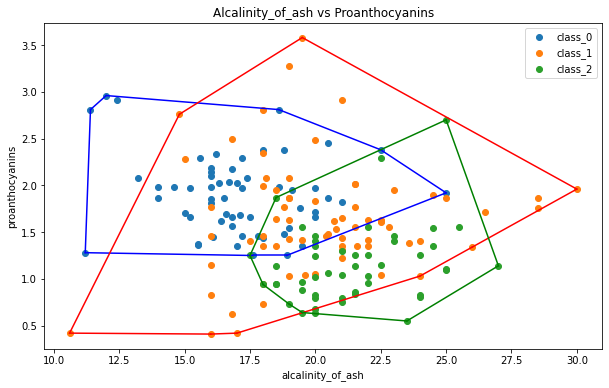

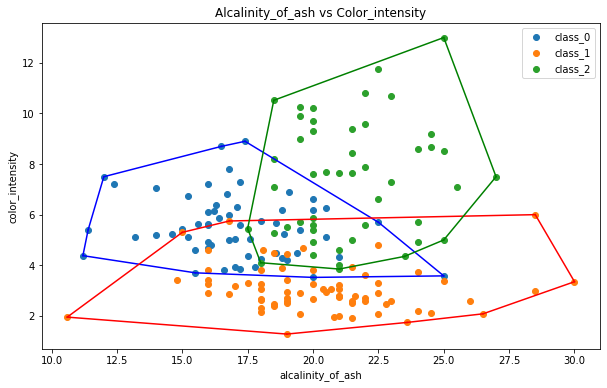

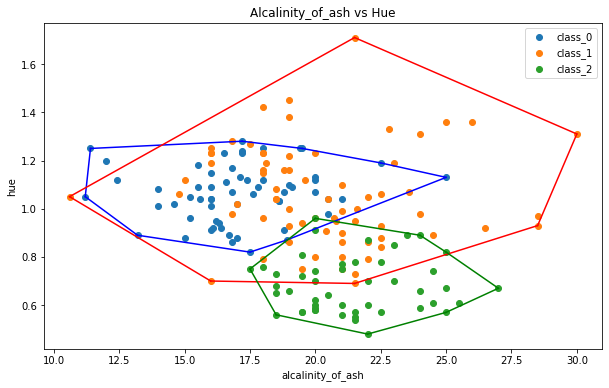

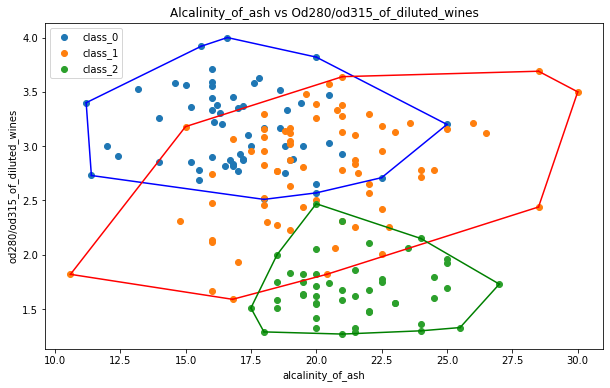

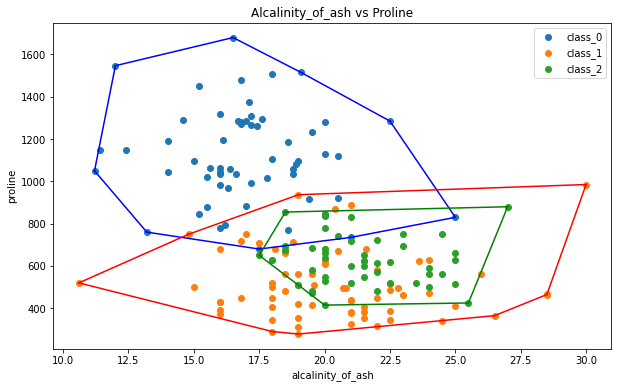

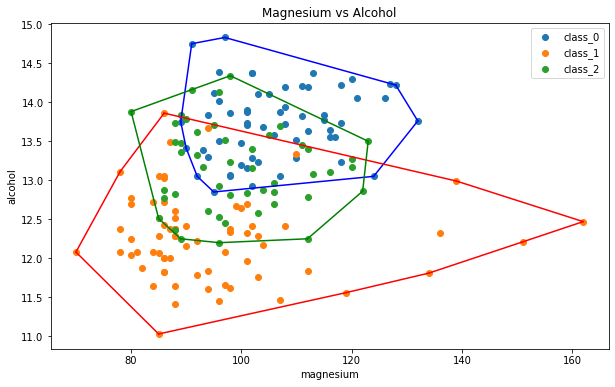

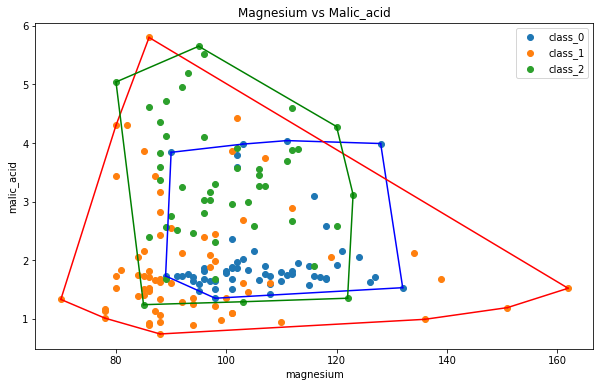

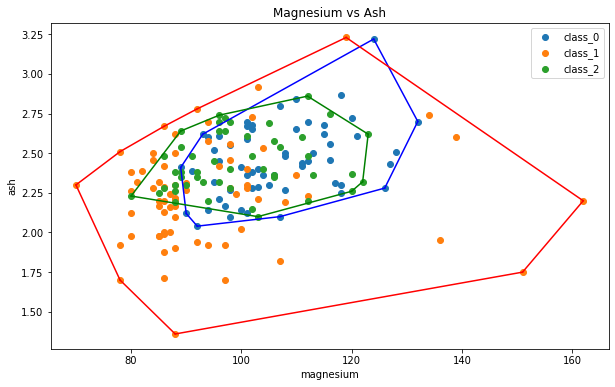

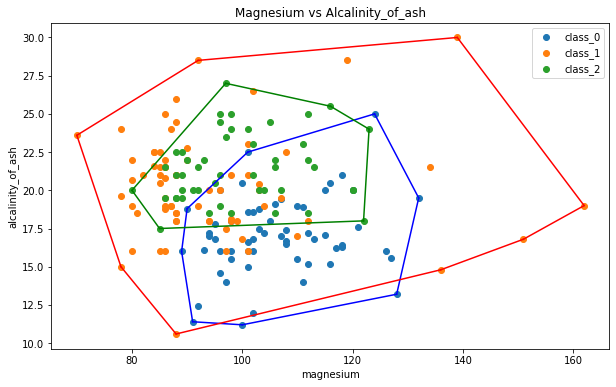

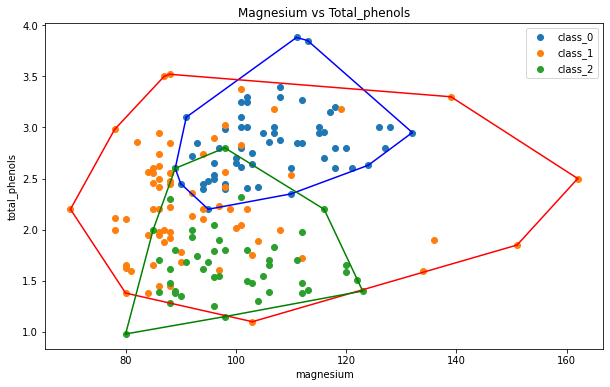

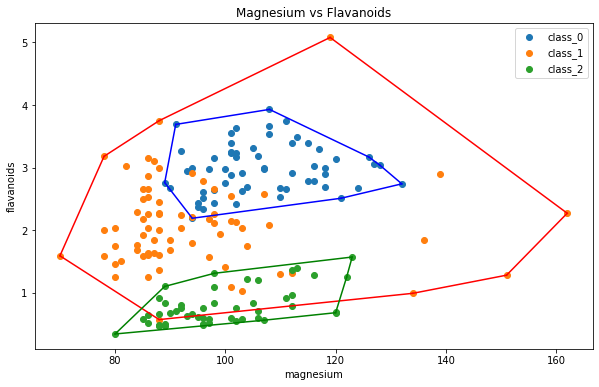

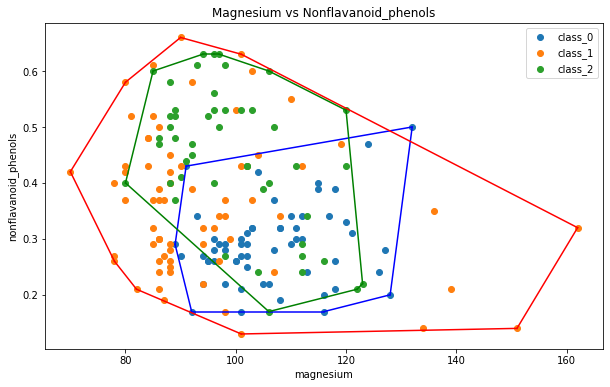

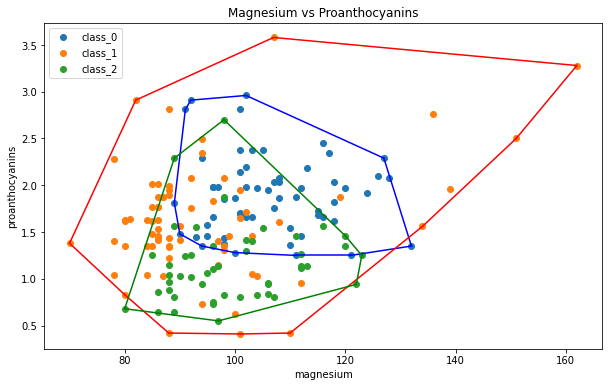

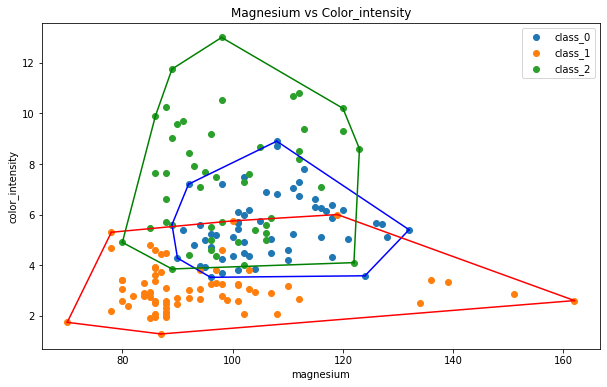

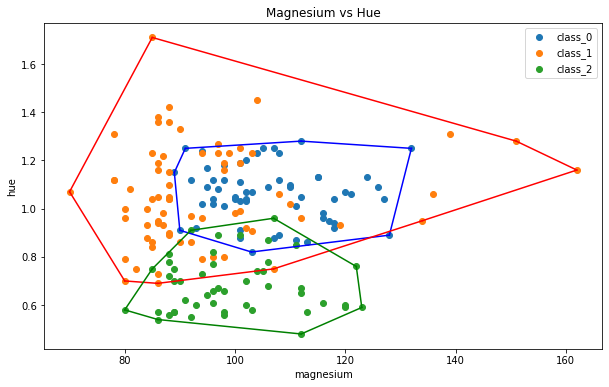

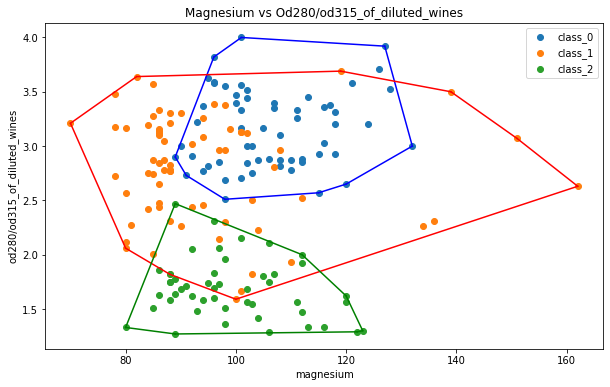

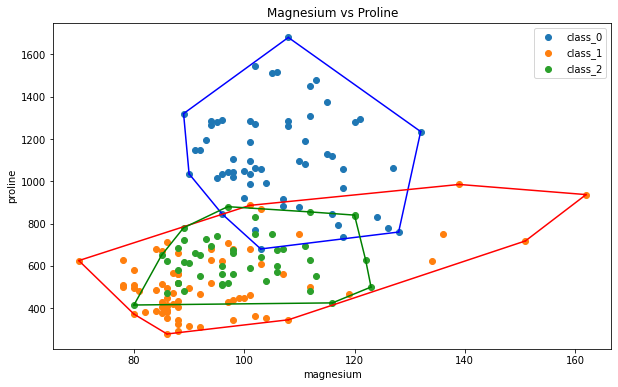

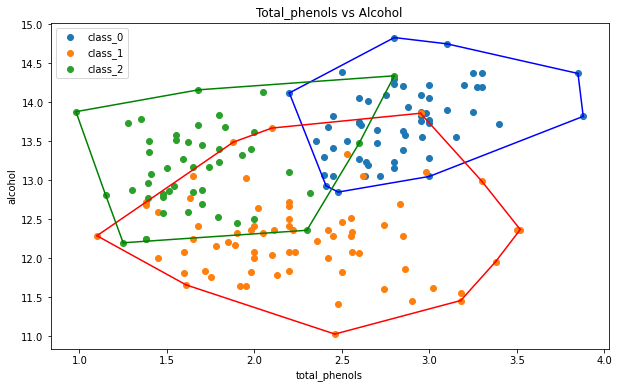

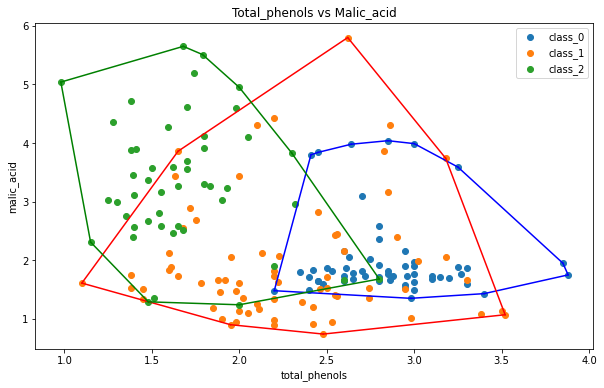

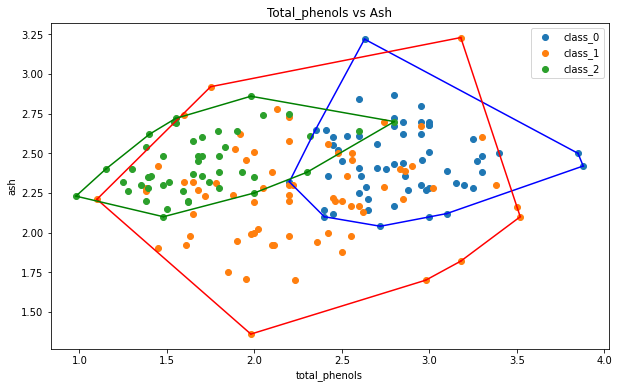

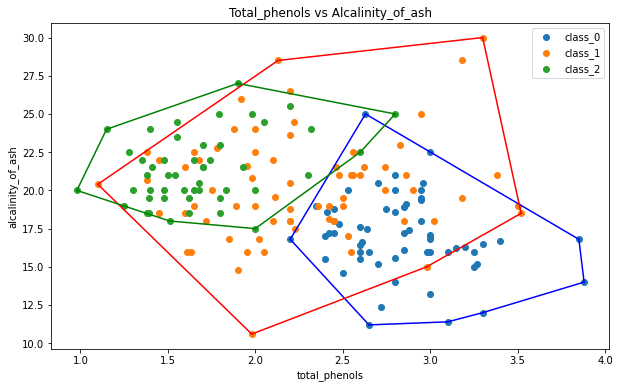

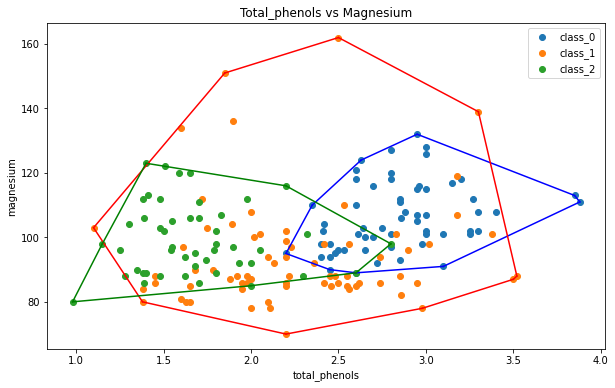

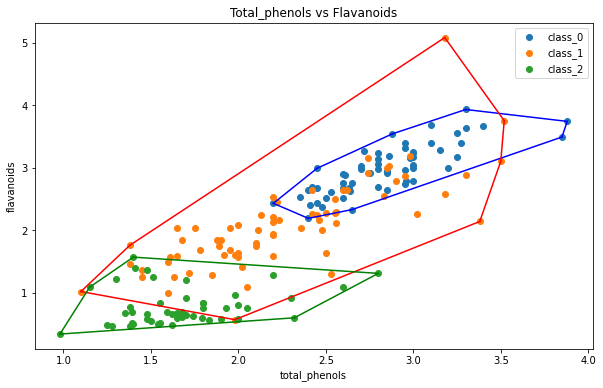

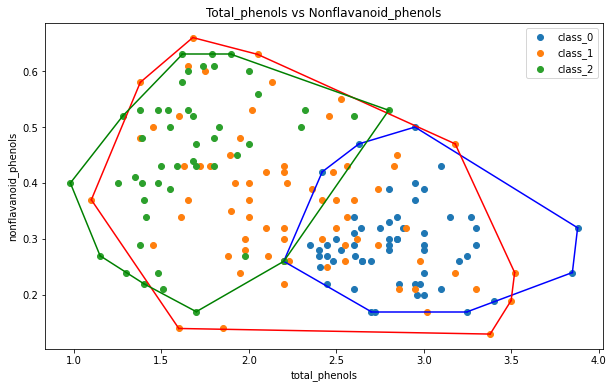

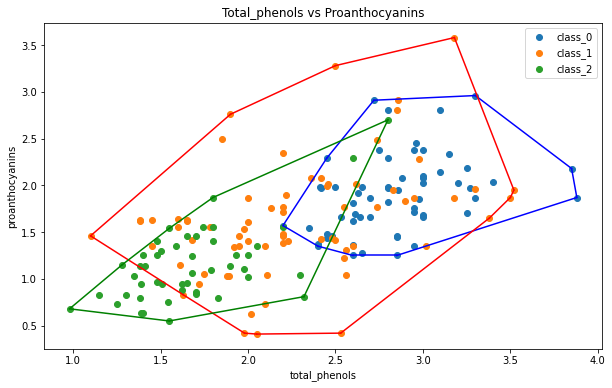

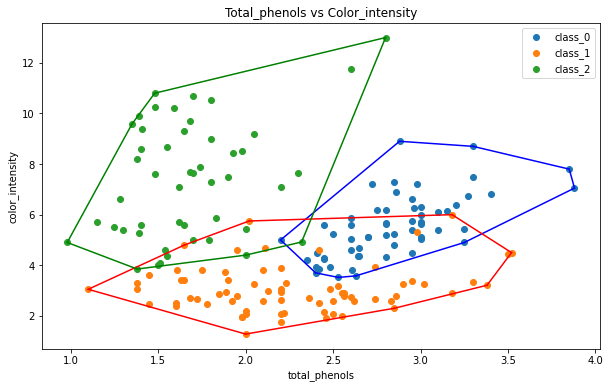

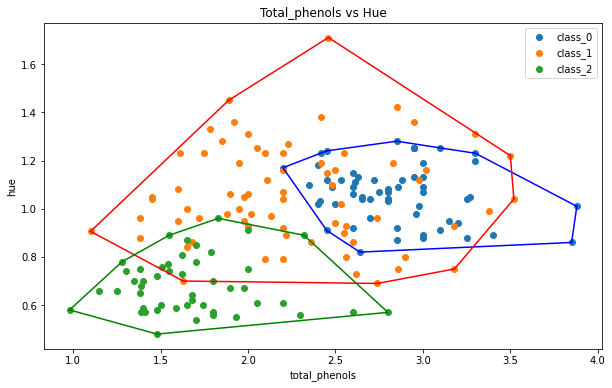

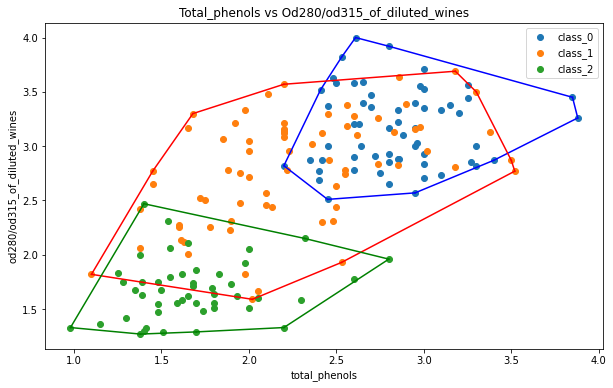

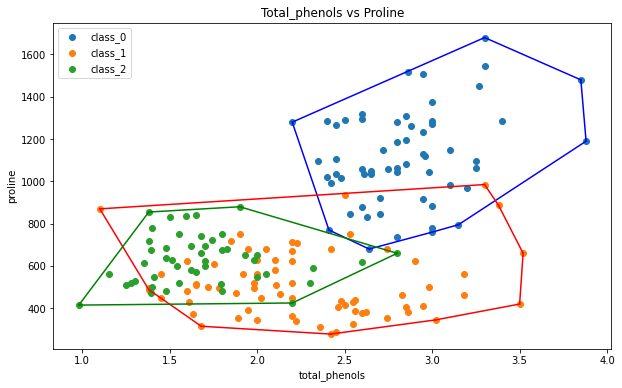

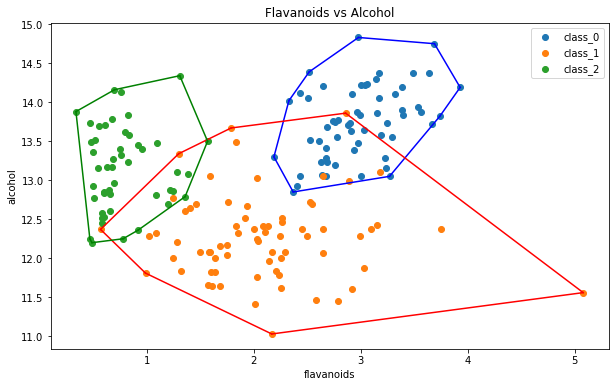

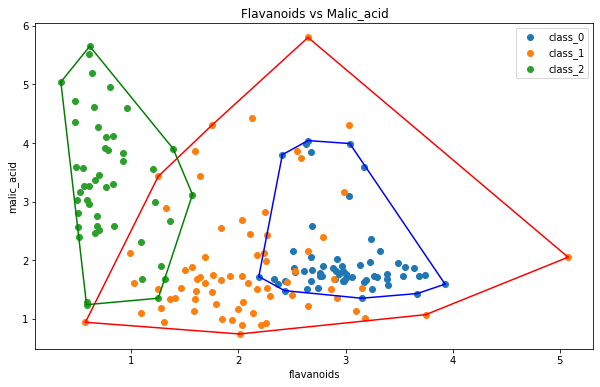

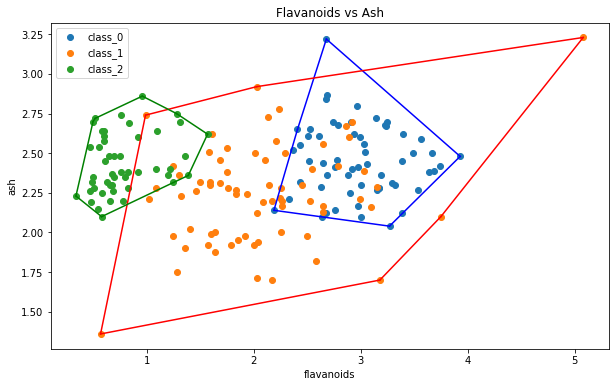

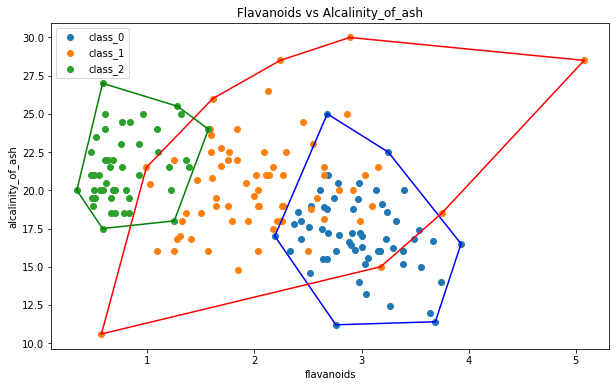

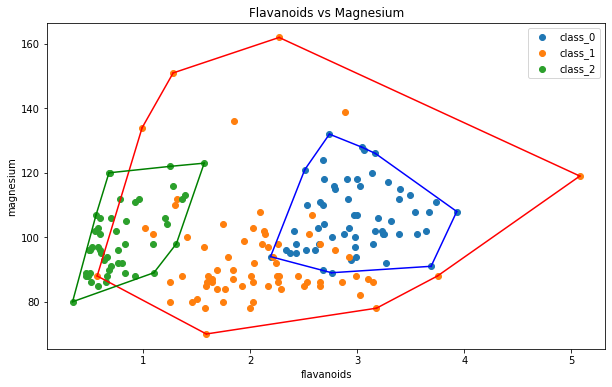

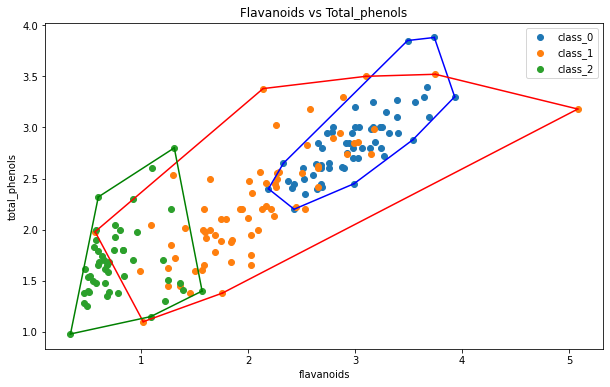

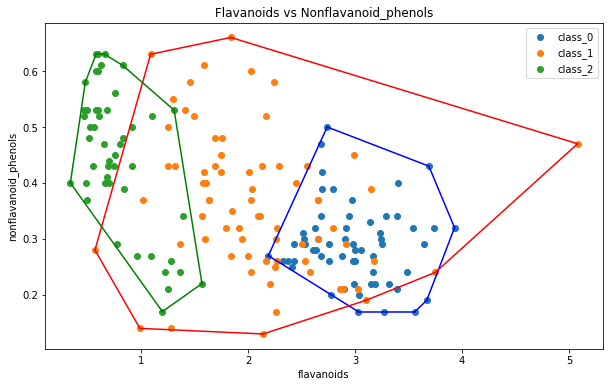

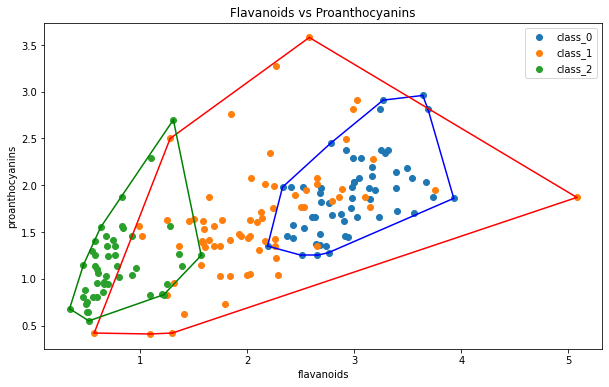

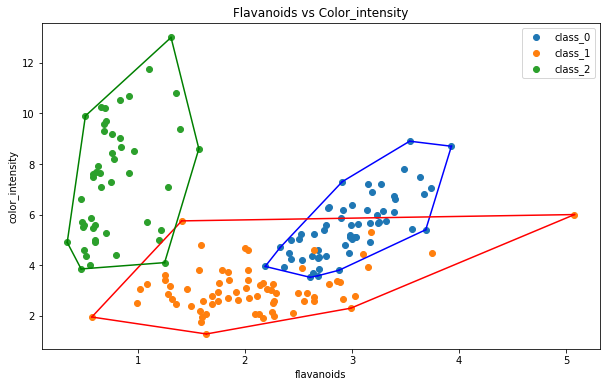

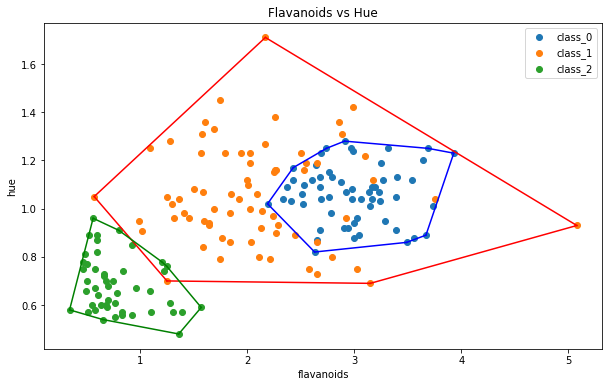

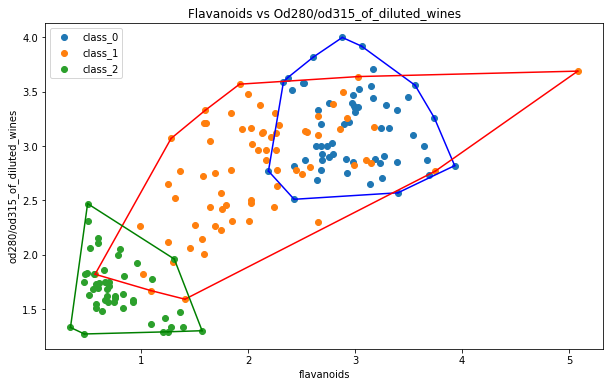

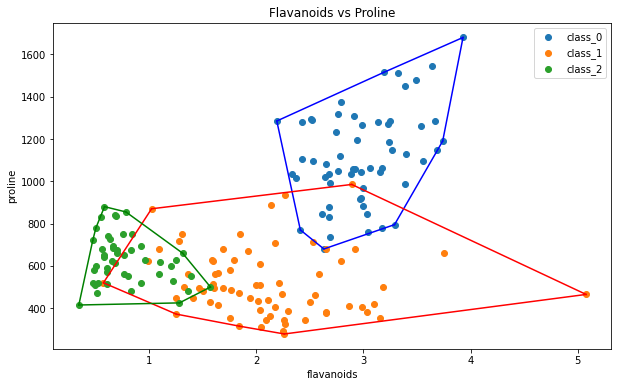

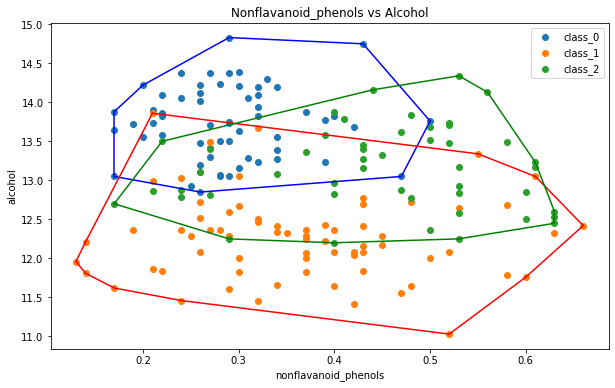

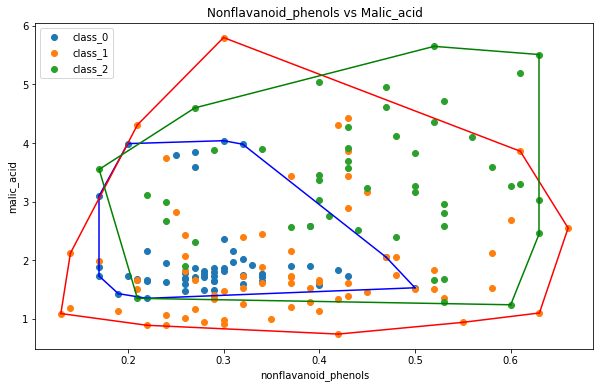

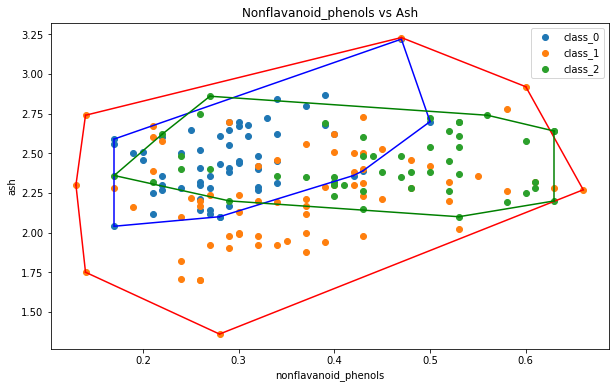

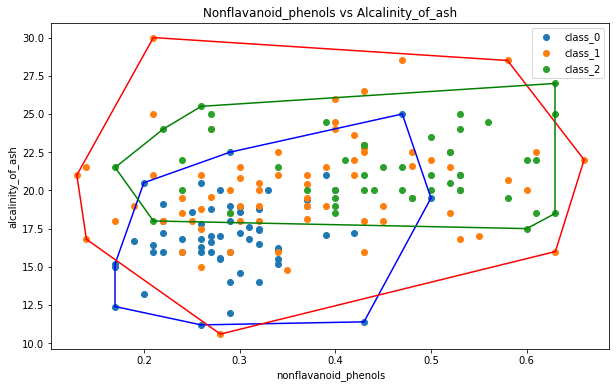

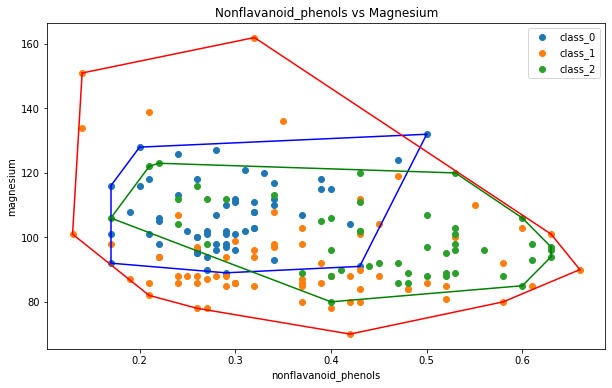

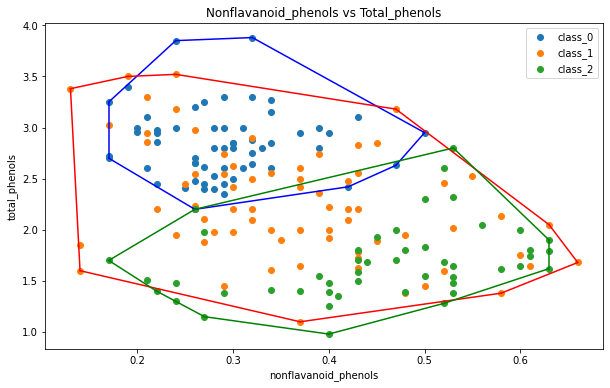

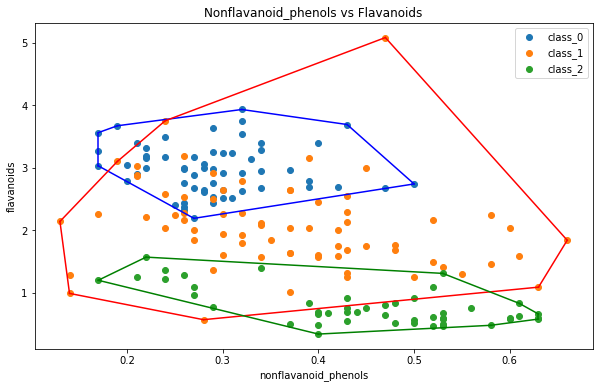

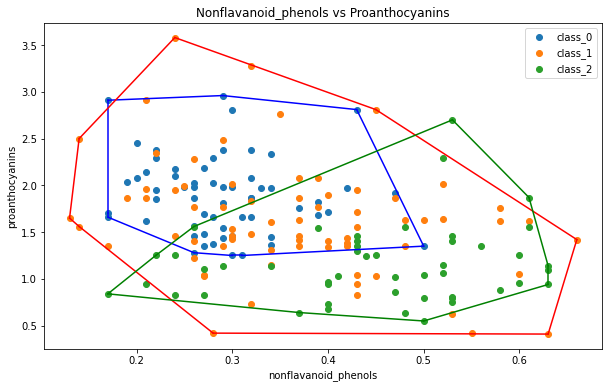

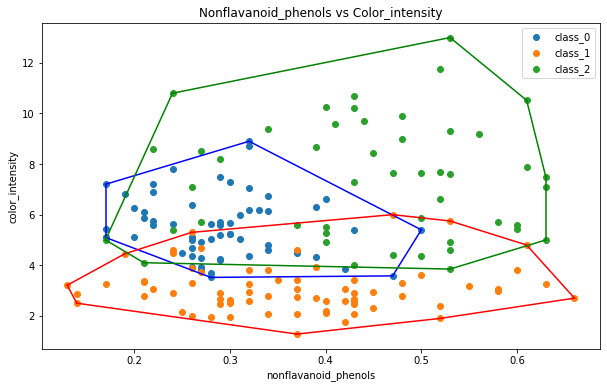

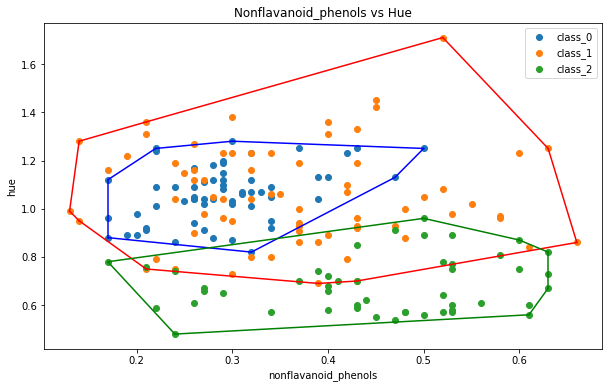

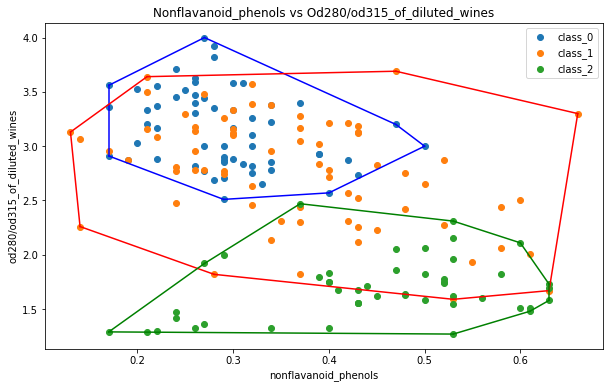

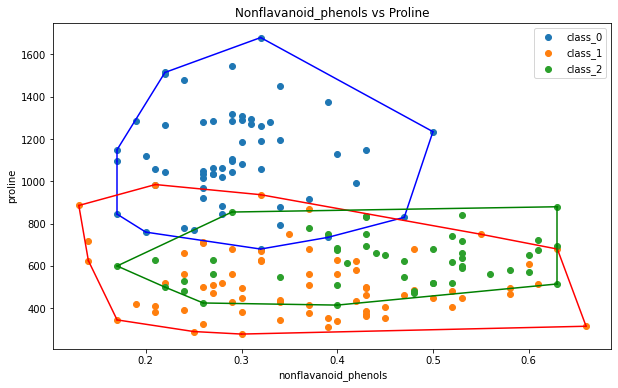

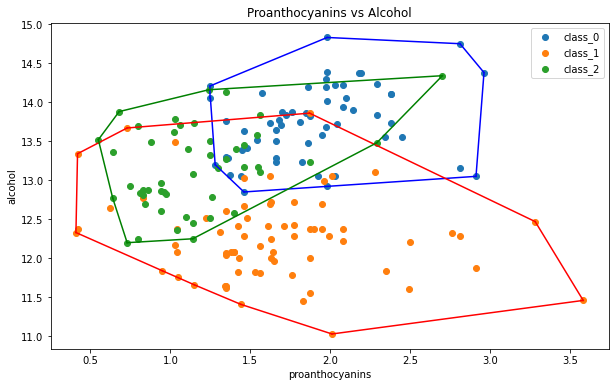

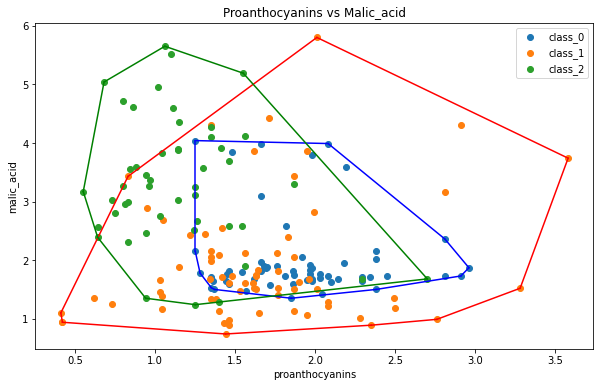

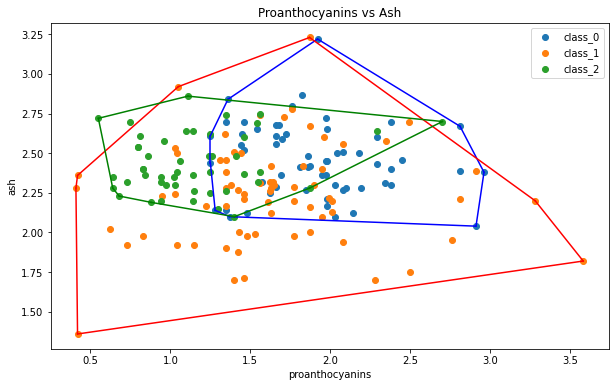

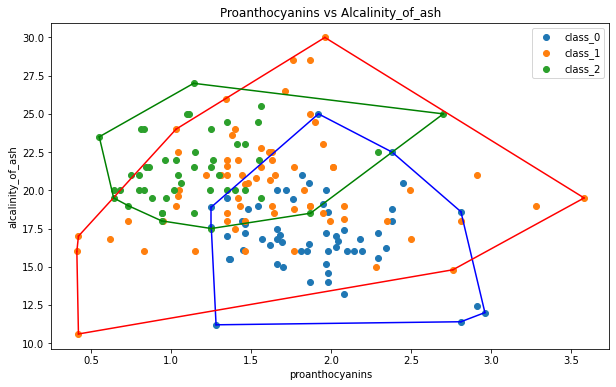

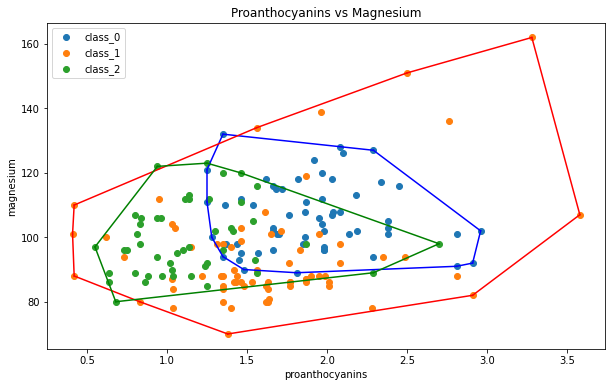

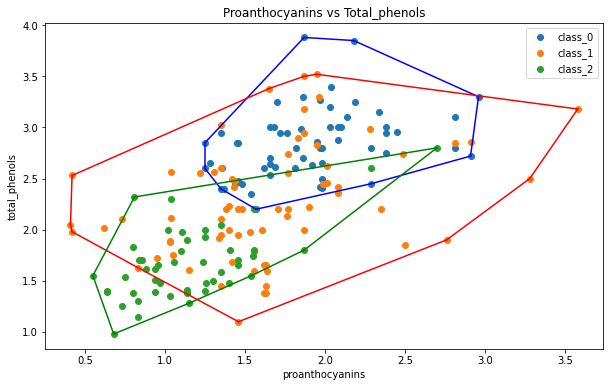

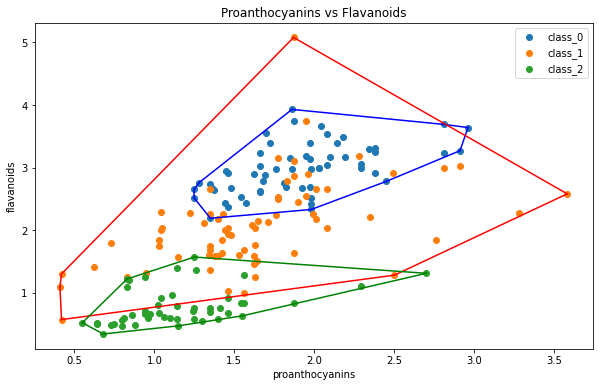

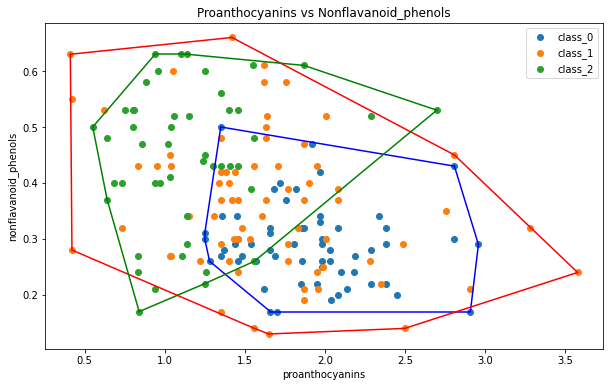

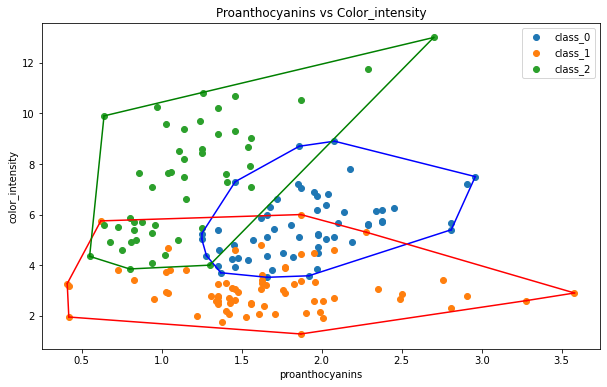

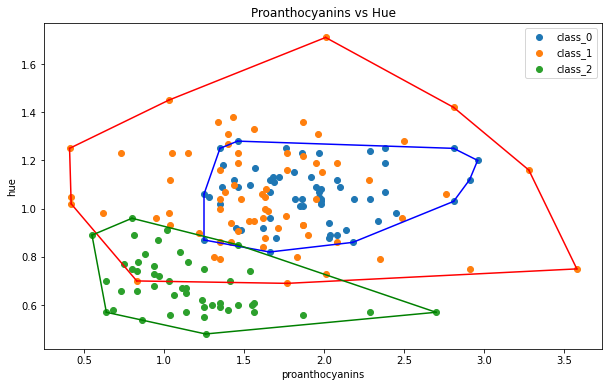

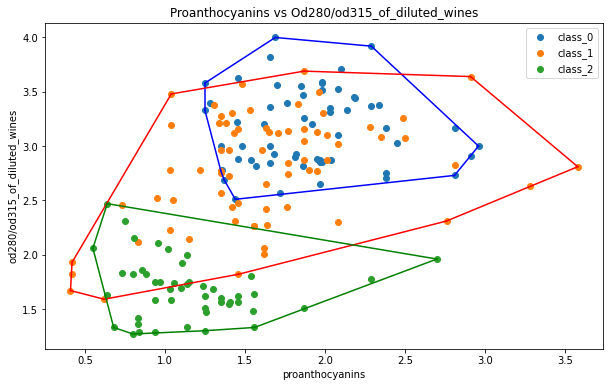

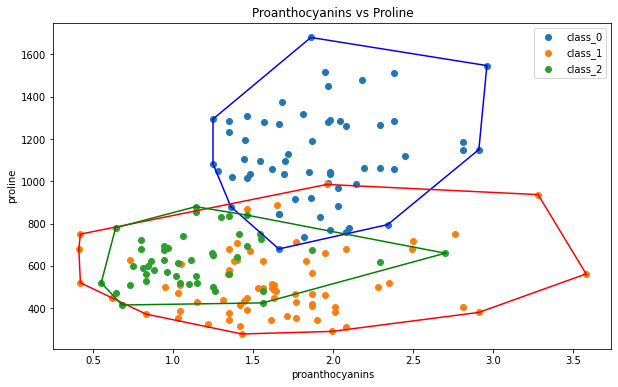

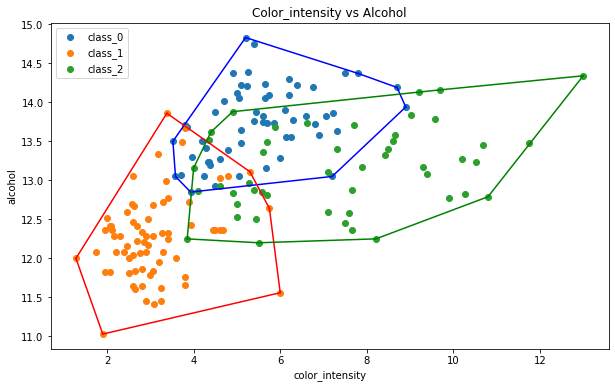

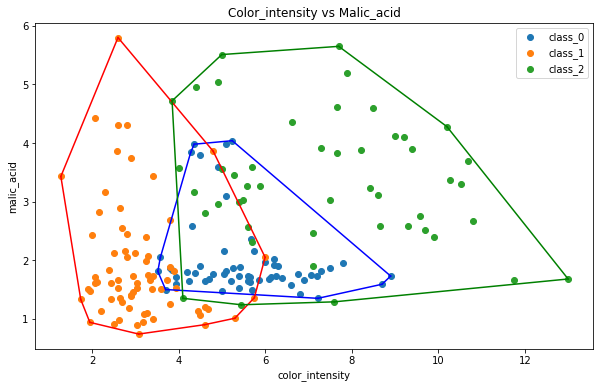

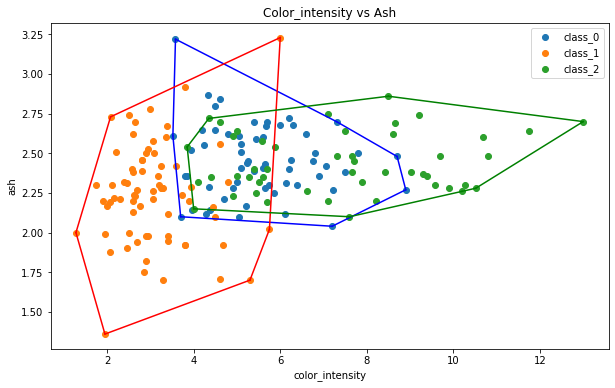

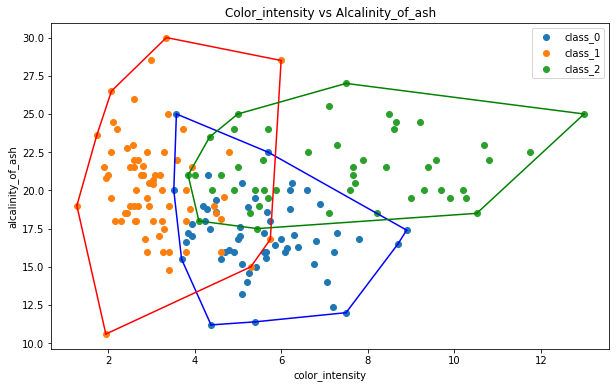

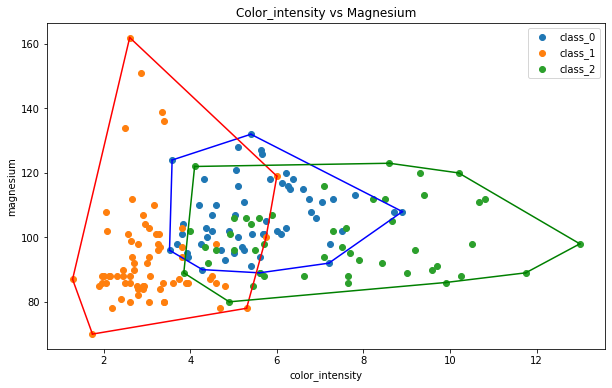

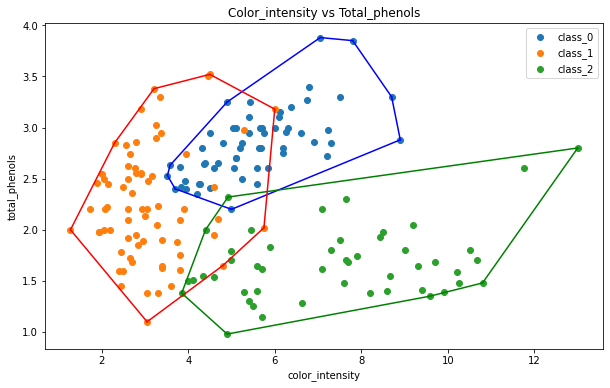

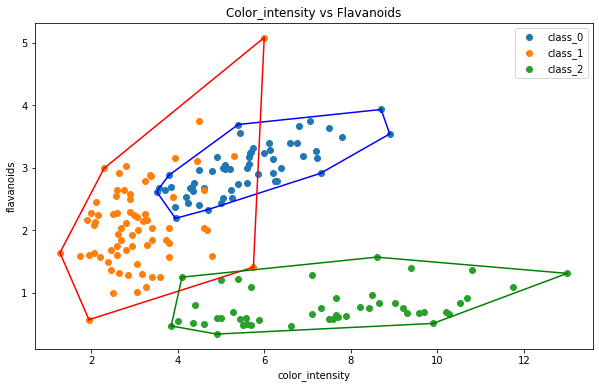

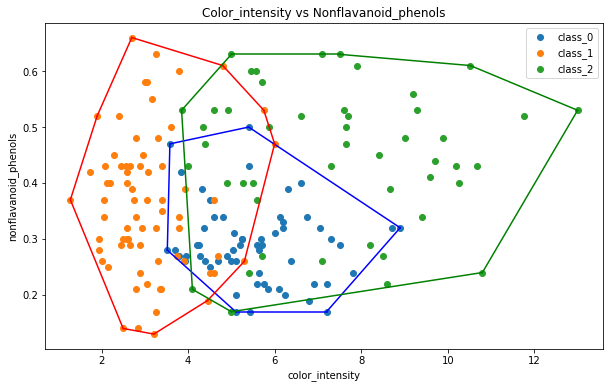

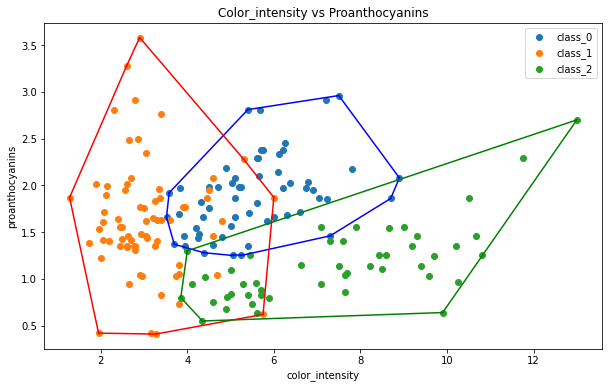

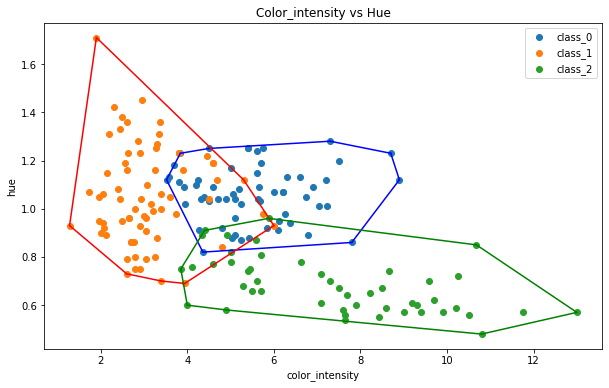

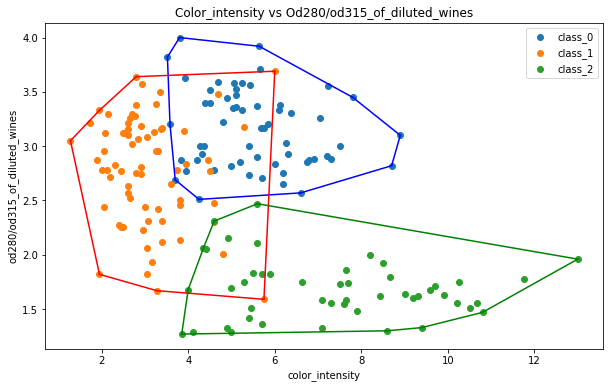

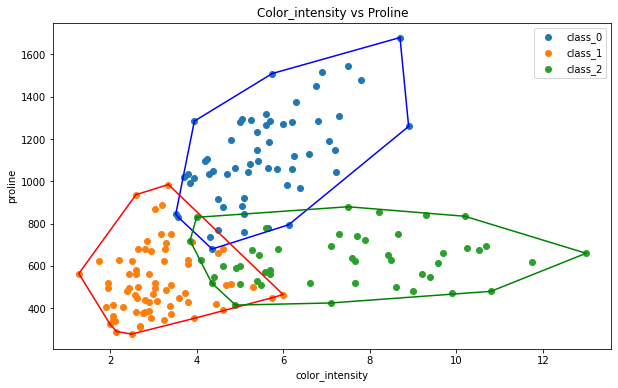

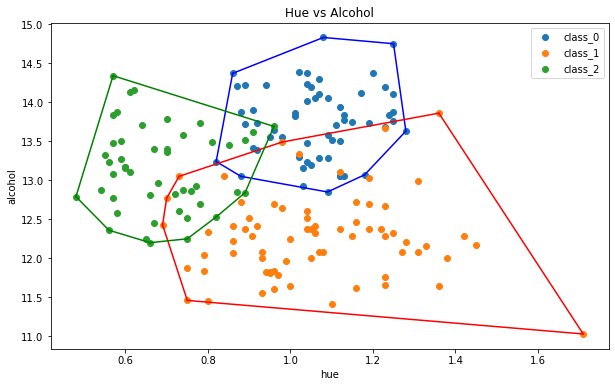

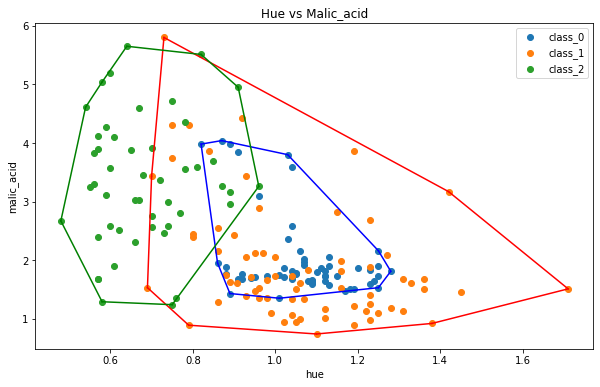

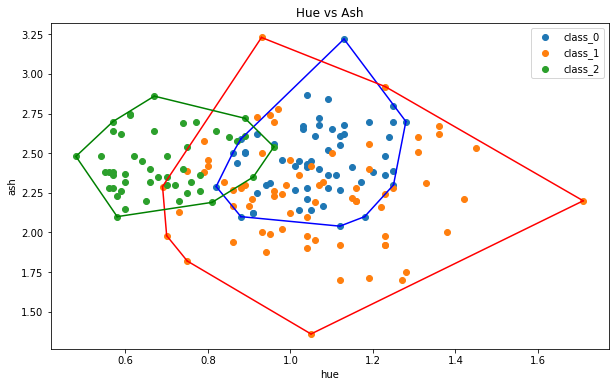

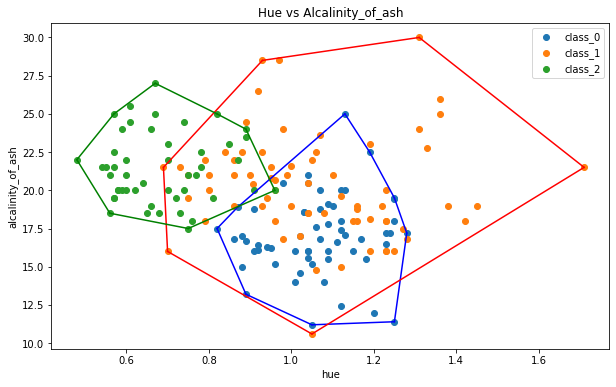

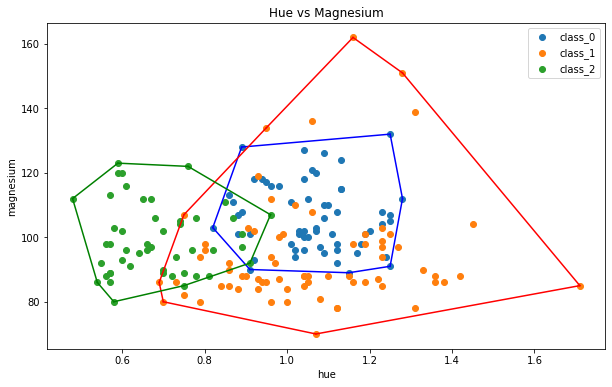

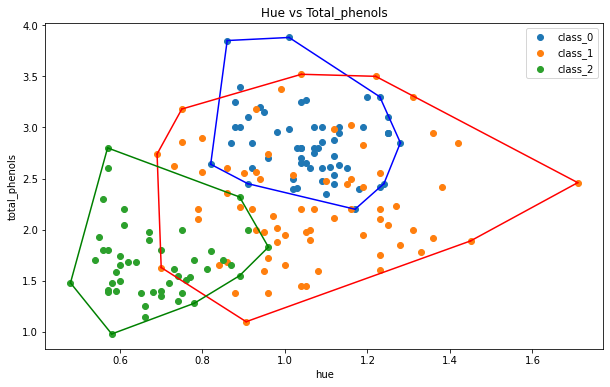

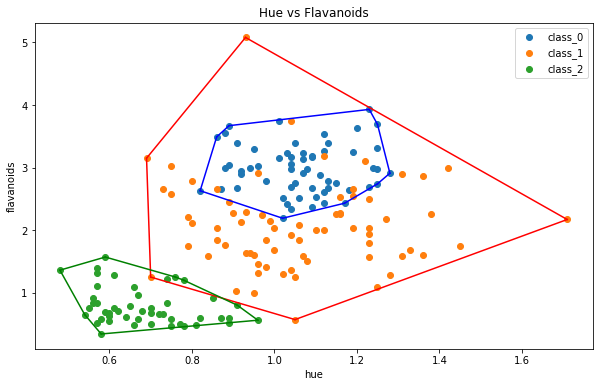

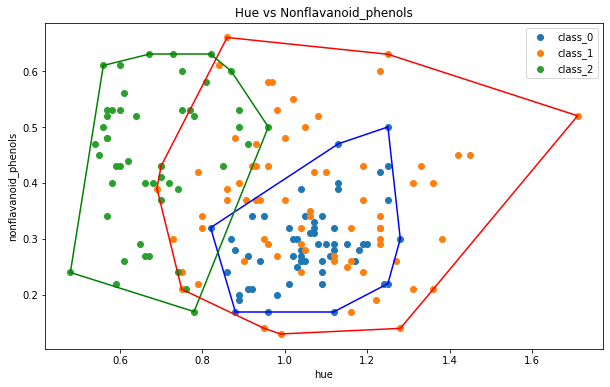

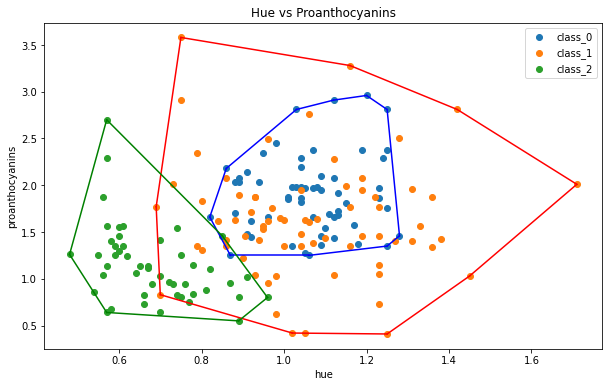

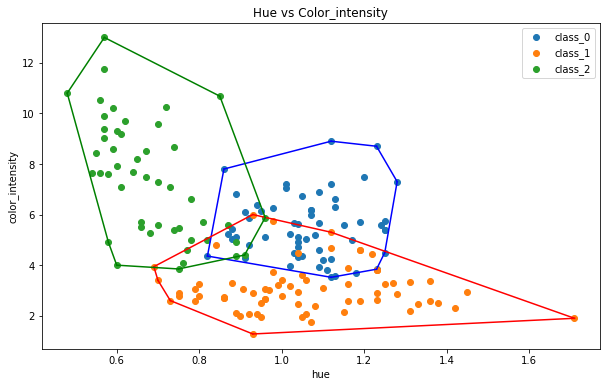

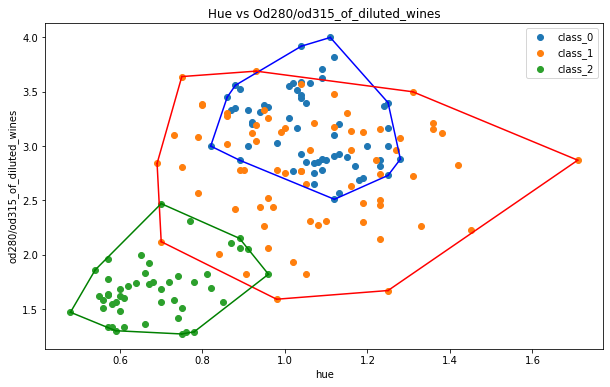

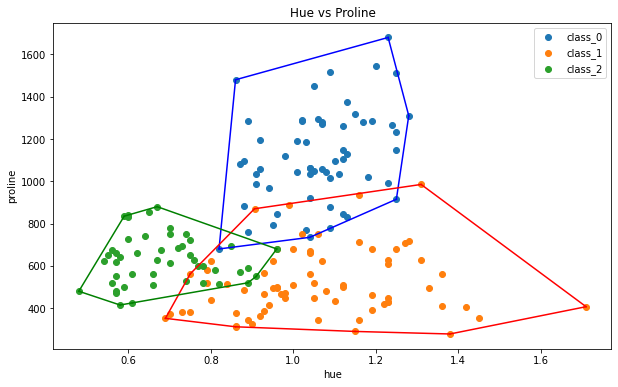

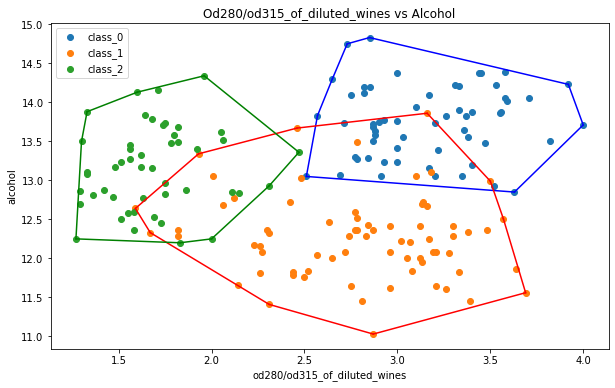

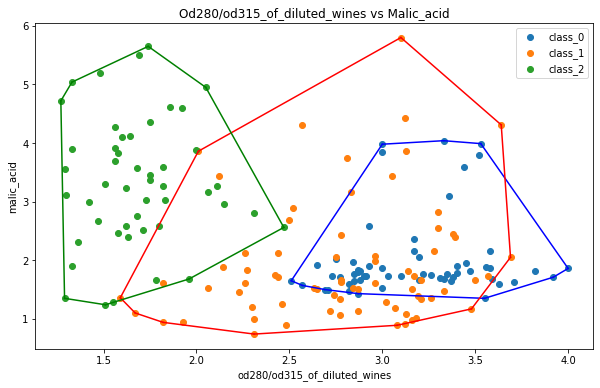

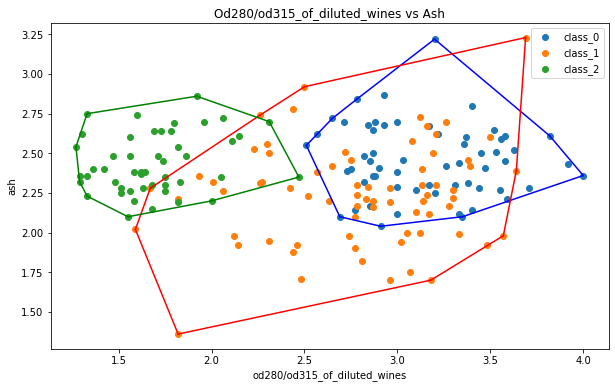

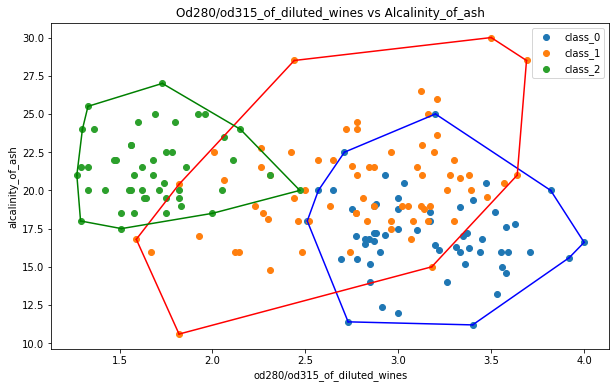

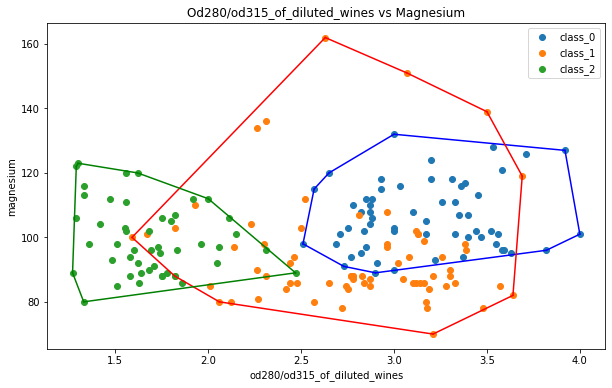

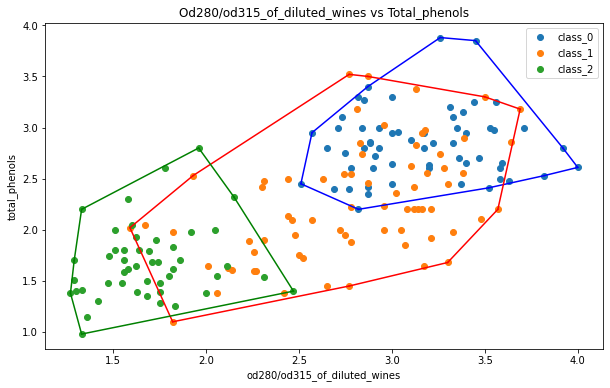

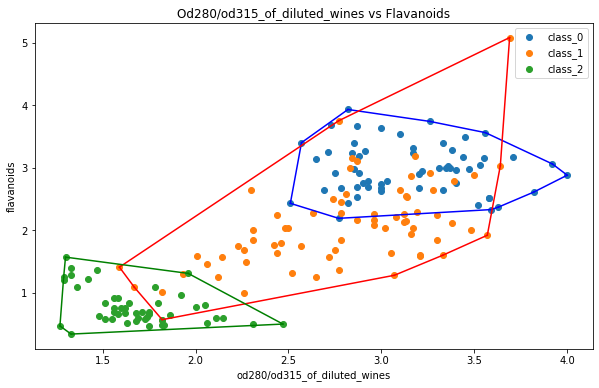

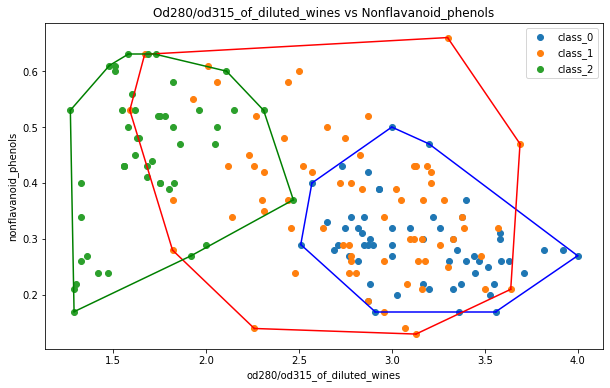

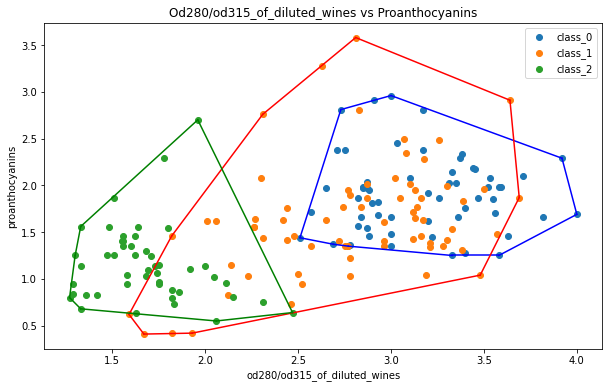

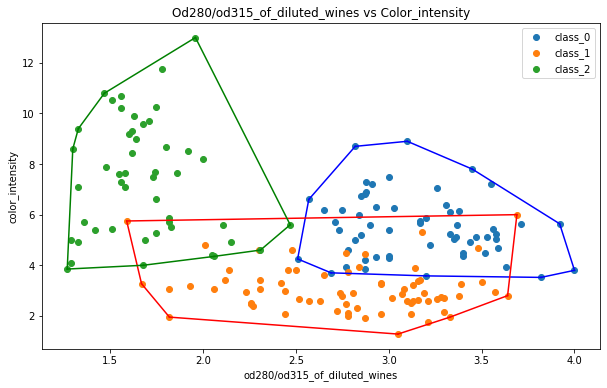

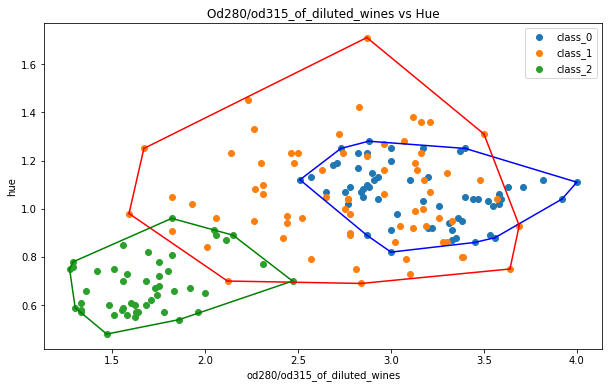

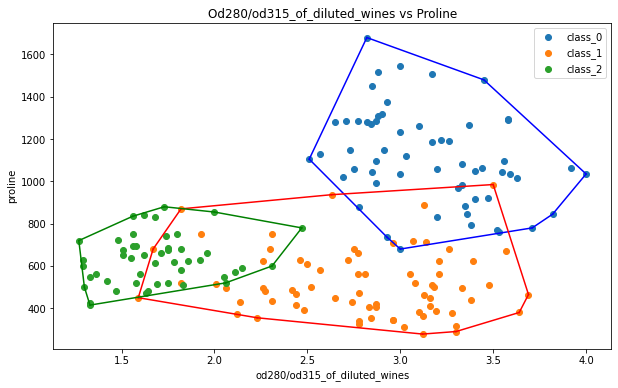

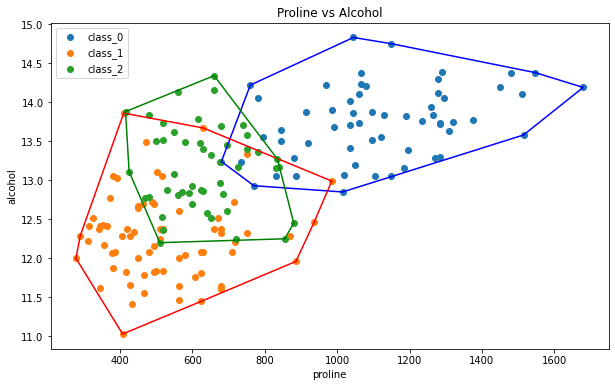

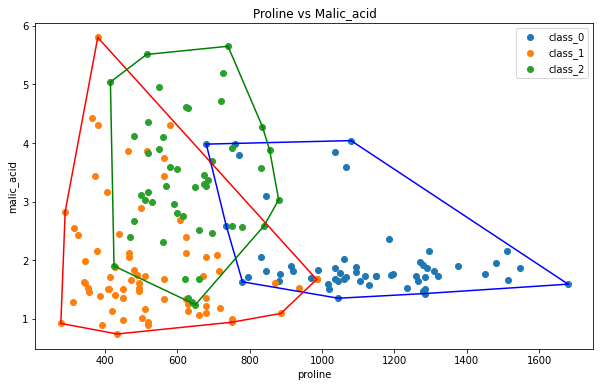

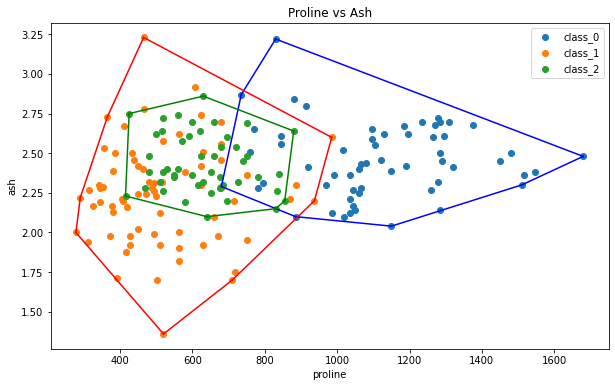

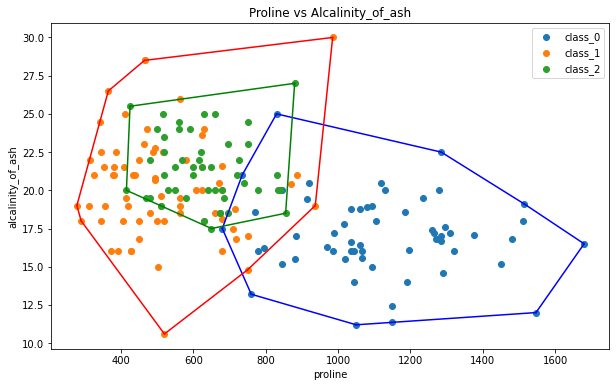

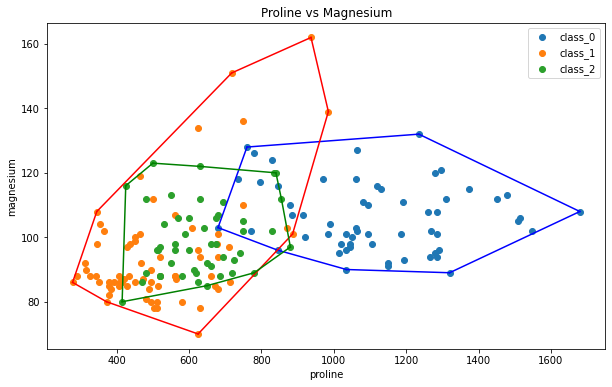

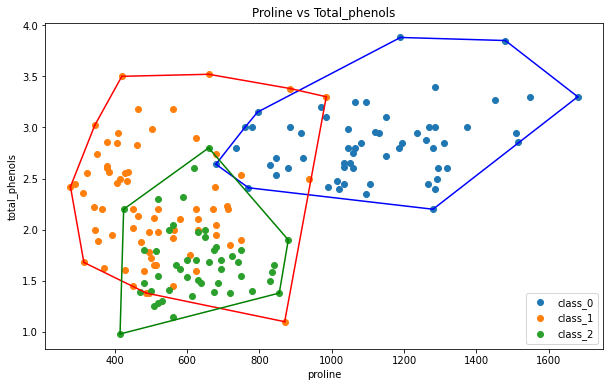

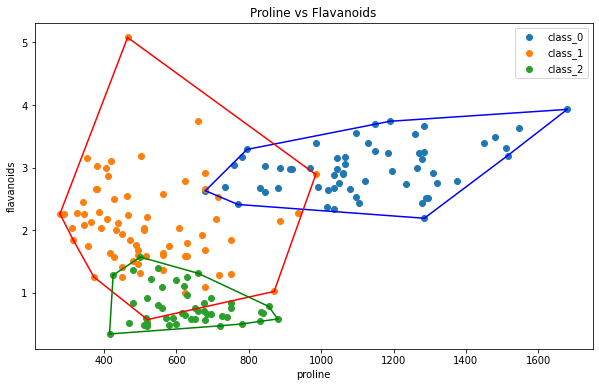

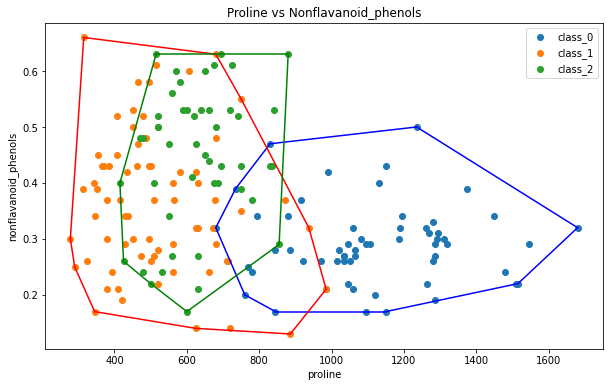

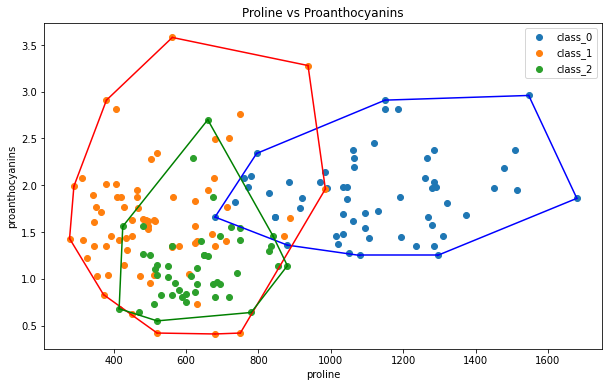

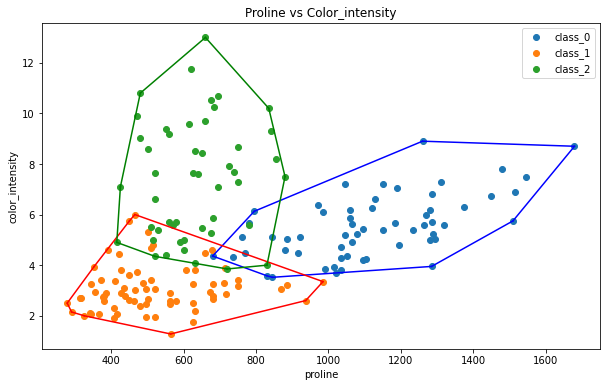

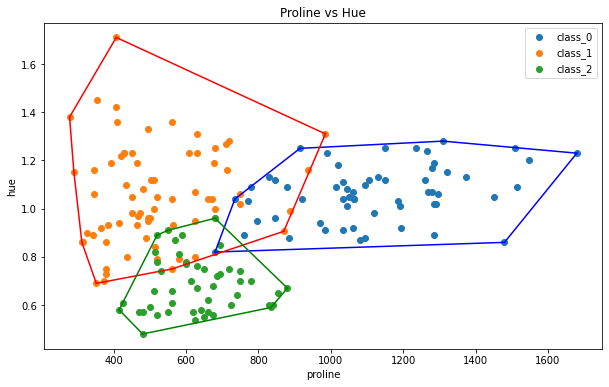

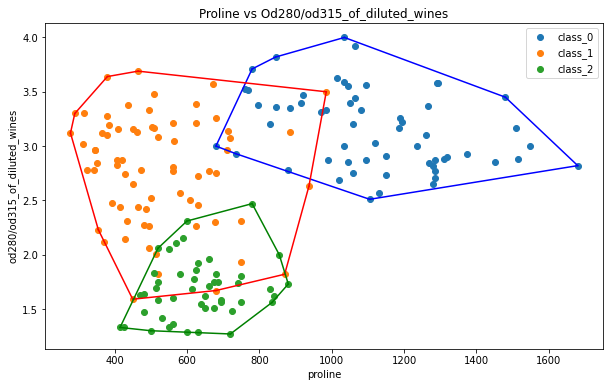

In [4]:
from itertools import permutations

def generate_all_permutations(num_of_features):
    perm = list(permutations(range(num_of_features), 2))
    for p in perm:
        print_my_convex_hull(p[0], p[1])

generate_all_permutations(df.shape[1] - 1)